# **Inisiasi Data**

## **Menentukan Tujuan & Ruang Lingkup**

Merumuskan tujuan utama proyek tracer
alumni, termasuk informasi yang
dibutuhkan untuk pengembangan
akademik dan parameter keberhasilan
proyek.

## **Identifikasi Stakeholder**

Memetakan semua pemangku
kepentingan yang terlibat dalam proyek,
termasuk fakultas, program studi, bagian
kemahasiswaan, dan mitra industri.

## **Menyusun Timeline**

Membuat jadwal terperinci dengan
milestone untuk setiap fase proyek,
termasuk tenggat waktu dan alokasi
sumber daya.

# **Persiapan Data**

In [1]:
pip install pandas Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.3 MB/s eta 0:00:00


# **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## **Membuat Dummy Dataset**

In [3]:
import pandas as pd
import faker
import random
import re

# Inisialisasi Faker untuk data Indonesia
fake = faker.Faker('id_ID')

# --- KONFIGURASI DATASET ---
JUMLAH_DATA = 350
PROGRAM_STUDI = "Teknik Elektro"
DOMISILI_OPSI = ['Karawang', 'Cikarang', 'Bekasi', 'Jakarta']
KONSENTRASI_OPSI = ["Teknik Tenaga Listrik (Arus Kuat)", "Teknik Elektronika (Arus Lemah)", "Teknik Telekomunikasi", "Teknik Kendali dan Instrumentasi", "Teknik Komputer"]
LOKASI_KERJA_OPSI = ['Jakarta', 'Bandung', 'Surabaya', 'Medan', 'Makassar', 'Karawang', 'Yogyakarta', 'Semarang', 'Batam']

# Data pool untuk membuat data lebih realistis
INDUSTRI_PERUSAHAAN = {
    'Energi': {
        'BUMN': ['PT PLN (Persero)', 'PT Pertamina Geothermal Energy', 'PT Pembangkitan Jawa-Bali'],
        'Multinasional': ['Schneider Electric', 'Siemens Energy', 'General Electric'],
        'Swasta Nasional': ['PT Adaro Energy', 'PT Medco Energi']
    },
    'Telekomunikasi': {
        'BUMN': ['PT Telkom Indonesia', 'PT Telkomsel'],
        'Multinasional': ['Huawei Indonesia', 'Ericsson Indonesia', 'Nokia Solutions'],
        'Swasta Nasional': ['PT Indosat Tbk', 'PT XL Axiata Tbk']
    },
    'Manufaktur': {
        'Multinasional': ['PT Astra Honda Motor', 'PT Toyota Motor Manufacturing', 'Samsung Electronics Indonesia'],
        'Swasta Nasional': ['PT Mayora Indah Tbk', 'PT Indofood CBP Sukses Makmur']
    },
    'IT': {
        'Startup': ['GoTo (Gojek Tokopedia)', 'Traveloka', 'Bukalapak'],
        'Multinasional': ['Google Indonesia', 'Microsoft Indonesia', 'IBM Indonesia'],
        'Konsultan': ['Accenture', 'Deloitte Consulting']
    },
    'Otomotif': {
        'Multinasional': ['PT Hyundai Motors Indonesia', 'PT Mitsubishi Motors Krama Yudha'],
        'Swasta Nasional': ['PT Astra Otoparts Tbk']
    },
    'Elektronik': {
        'Multinasional': ['PT LG Electronics Indonesia', 'Panasonic Manufacturing Indonesia'],
        'Swasta Nasional': ['PT Hartono Istana Teknologi (Polytron)']
    }
}

POSISI_JABATAN = {
    'Teknik Tenaga Listrik (Arus Kuat)': ['Power System Engineer', 'Electrical Maintenance Supervisor', 'Project Engineer', 'HSE Officer'],
    'Teknik Elektronika (Arus Lemah)': ['Electronics Engineer', 'Hardware Design Engineer', 'PCB Layout Designer', 'Test Engineer'],
    'Teknik Telekomunikasi': ['Network Engineer', 'RF (Radio Frequency) Engineer', 'Core Network Specialist', 'Field Engineer'],
    'Teknik Kendali dan Instrumentasi': ['Control System Engineer', 'Instrumentation Engineer', 'Automation & Robotics Engineer', 'PLC Programmer'],
    'Teknik Komputer': ['Data Analyst', 'Data Sientist', 'AI Engineer', 'Machine Learning Engineer', 'IT Support Specialist', 'Firmware Engineer', 'System Administrator']
}

KETERAMPILAN_TAMBAHAN = [
    'AWS Certified Cloud Practitioner', 'PLC Programming (Siemens/Allen-Bradley)', 'Python for Data Science',
    'TOEFL > 550', 'CCNA (Cisco Certified Network Associate)', 'Project Management Professional (PMP)',
    'MikroTik MTCNA', 'Data Visualization (Tableau)', 'Certified Ethical Hacker (CEH)'
]

UMPAN_BALIK = [
    'Perbanyak praktikum IoT dan embedded system.', 'Tambahkan mata kuliah tentang machine learning.',
    'Kurikulum perlu lebih fokus pada energi terbarukan dan smart grid.', 'Kerja sama industri untuk program magang perlu ditingkatkan.',
    'Materi telekomunikasi 5G dan teknologi nirkabel perlu diperbarui.', 'Tingkatkan workshop tentang soft skills dan manajemen proyek.',
    'Perlu ada mata kuliah pilihan tentang kendaraan listrik (EV).', 'Sertifikasi keahlian (misal: PLC) sebaiknya diintegrasikan dalam kurikulum.'
]

# --- FUNGSI UNTUK MENGHASILKAN DATA ---
def generate_dataset(n_rows):
    data_alumni = []
    for i in range(n_rows):
        # 1. Data Pribadi & Akademik
        nama = fake.name()
        domisili = random.choice(DOMISILI_OPSI)
        tahun_angkatan = random.randint(2016, 2024)
        konsentrasi = random.choice(KONSENTRASI_OPSI)

        # Buat email dummy yang konsisten
        nama_clean = re.sub(r'\W+', '', nama.lower().replace(" ", "."))
        email = f"{nama_clean}{str(tahun_angkatan)[-2:]}@email.com"

        # 2. Informasi Karir (saling terkait)
        bidang_industri = random.choice(list(INDUSTRI_PERUSAHAAN.keys()))
        tipe_perusahaan = random.choice(list(INDUSTRI_PERUSAHAAN[bidang_industri].keys()))
        perusahaan = random.choice(INDUSTRI_PERUSAHAAN[bidang_industri][tipe_perusahaan])
        posisi = random.choice(POSISI_JABATAN[konsentrasi])
        lokasi_geografis = random.choice(LOKASI_KERJA_OPSI)

        # 3. Gaji (tergantung tahun angkatan dan tipe perusahaan)
        gaji_dasar = 4000000
        # Kenaikan gaji berdasarkan pengalaman (tahun lulus)
        pengalaman = 2025 - (tahun_angkatan + 4) # Asumsi lulus 4 tahun
        kenaikan_per_tahun = random.randint(500000, 1200000)
        gaji = gaji_dasar + (pengalaman * kenaikan_per_tahun)
        # Penyesuaian berdasarkan tipe perusahaan
        if tipe_perusahaan == 'Multinasional':
            gaji *= 1.4
        elif tipe_perusahaan == 'BUMN':
            gaji *= 1.2
        elif tipe_perusahaan == 'Startup':
            gaji *= 1.1
        gaji = min(max(gaji, 4000000), 25000000) # Batasi gaji dalam rentang
        gaji = round(gaji / 100000) * 100000 # Bulatkan ke ratusan ribu terdekat

        # 4. Data Tambahan
        relevansi_kurikulum = round(random.uniform(2.5, 5.0), 1)
        keterampilan_tambahan = ", ".join(random.sample(KETERAMPILAN_TAMBAHAN, k=random.randint(1, 3)))
        umpan_balik = random.choice(UMPAN_BALIK)

        data_alumni.append({
            'Nama': nama,
            'Domisili': domisili,
            'Tahun Angkatan': tahun_angkatan,
            'Program Studi': PROGRAM_STUDI,
            'Konsentrasi': konsentrasi,
            'Informasi Kontak': email,
            'Perusahaan': perusahaan,
            'Posisi/Jabatan': posisi,
            'Bidang Industri': bidang_industri,
            'Gaji': int(gaji),
            'Lokasi Geografis': lokasi_geografis,
            'Relevansi Kurikulum': relevansi_kurikulum,
            'Keterampilan Tambahan': keterampilan_tambahan,
            'Umpan Balik': umpan_balik
        })
    return data_alumni

# --- EKSEKUSI DAN SIMPAN FILE ---
if __name__ == "__main__":
    dataset = generate_dataset(JUMLAH_DATA)
    df = pd.DataFrame(dataset)

    # Simpan ke file CSV
    nama_file_csv = 'tracer_alumni_elektro_unsika.csv'
    df.to_csv(nama_file_csv, index=False, encoding='utf-8')

    print(f"✅ Dataset dummy berhasil dibuat!")
    print(f"Jumlah data: {len(df)} baris")
    print(f"File disimpan sebagai: '{nama_file_csv}'")
    print("\n--- Contoh 5 Baris Data Pertama ---")
    print(df.head().to_string())

✅ Dataset dummy berhasil dibuat!
Jumlah data: 350 baris
File disimpan sebagai: 'tracer_alumni_elektro_unsika.csv'

--- Contoh 5 Baris Data Pertama ---
                      Nama  Domisili  Tahun Angkatan   Program Studi                        Konsentrasi              Informasi Kontak                     Perusahaan                 Posisi/Jabatan Bidang Industri     Gaji Lokasi Geografis  Relevansi Kurikulum                                                                                    Keterampilan Tambahan                                                    Umpan Balik
0  Ir. Puji Simbolon, S.E.  Cikarang            2016  Teknik Elektro    Teknik Elektronika (Arus Lemah)  irpujisimbolonse16@email.com  PT Indofood CBP Sukses Makmur           Electronics Engineer      Manufaktur  8100000       Yogyakarta                  4.2  Certified Ethical Hacker (CEH), Project Management Professional (PMP), AWS Certified Cloud Practitioner                Tambahkan mata kuliah tentang machine learn

## **Proses Indentifikasi Data**

In [4]:
# 1. Tampilkan informasi dasar tentang DataFrame
print("-- Informasi Dasar DataFrame --")
df.info()
print("\n--- Statistik Deskriptif Data Numerik ---")
display(df.describe())
print("\n--- Statistik Deskriptif Data Kategorikal ---")
display(df.describe(include='object'))

-- Informasi Dasar DataFrame --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nama                   350 non-null    object 
 1   Domisili               350 non-null    object 
 2   Tahun Angkatan         350 non-null    int64  
 3   Program Studi          350 non-null    object 
 4   Konsentrasi            350 non-null    object 
 5   Informasi Kontak       350 non-null    object 
 6   Perusahaan             350 non-null    object 
 7   Posisi/Jabatan         350 non-null    object 
 8   Bidang Industri        350 non-null    object 
 9   Gaji                   350 non-null    int64  
 10  Lokasi Geografis       350 non-null    object 
 11  Relevansi Kurikulum    350 non-null    float64
 12  Keterampilan Tambahan  350 non-null    object 
 13  Umpan Balik            350 non-null    object 
dtypes: float64(1), int64(2), o

,Tahun Angkatan,Gaji,Relevansi Kurikulum
count,350.000000,3.500000e+02,350.000000
mean,2019.922857,6.272286e+06,3.710571
std,2.556478,2.407308e+06,0.724818
min,2016.000000,4.000000e+06,2.500000
25%,2017.250000,4.000000e+06,3.100000
50%,2020.000000,5.600000e+06,3.700000
75%,2022.000000,7.975000e+06,4.300000
max,2024.000000,1.390000e+07,5.000000



--- Statistik Deskriptif Data Kategorikal ---


,Nama,Domisili,Program Studi,Konsentrasi,Informasi Kontak,Perusahaan,Posisi/Jabatan,Bidang Industri,Lokasi Geografis,Keterampilan Tambahan,Umpan Balik
count,350,350,350,350,350,350,350,350,350,350,350
unique,350,4,1,5,350,34,23,6,9,191,8
top,Maimunah Kusumo,Karawang,Teknik Elektro,Teknik Elektronika (Arus Lemah),maimunahkusumo18@email.com,PT Hartono Istana Teknologi (Polytron),Automation & Robotics Engineer,Manufaktur,Batam,MikroTik MTCNA,Sertifikasi keahlian (misal: PLC) sebaiknya di...
freq,1,98,350,77,1,29,27,61,50,20,55


## **Proses Membersihkan Data**

### Menghapus Duplikasi

In [5]:
# 2. Hapus duplikasi baris data
initial_rows = len(df)
df.drop_duplicates(inplace=True)
rows_after_dropping_duplicates = len(df)
print(f"\n--- Penanganan Duplikasi ---")
print(f"Jumlah baris sebelum dihapus duplikasi: {initial_rows}")
print(f"Jumlah baris setelah dihapus duplikasi: {rows_after_dropping_duplicates}")
print(f"Jumlah duplikasi yang dihapus: {initial_rows - rows_after_dropping_duplicates}")


--- Penanganan Duplikasi ---
Jumlah baris sebelum dihapus duplikasi: 350
Jumlah baris setelah dihapus duplikasi: 350
Jumlah duplikasi yang dihapus: 0


### Memperbaiki Penulisan pada data

In [6]:
# 3. Perbaiki kesalahan penulisan pada kolom teks (typos)
typo_corrections = {
    'Domisili': {'Jakrta': 'Jakarta', 'Bandug': 'Bandung'},
    'Lokasi Geografis': {'Jakrta': 'Jakarta', 'Bandug': 'Bandung'}
}

print("\n--- Perbaikan Typo ---")
for column, corrections in typo_corrections.items():
    if column in df.columns:
        initial_unique = df[column].nunique()
        df[column] = df[column].replace(corrections)
        after_correction_unique = df[column].nunique()
        print(f"Kolom '{column}': Jumlah nilai unik sebelum perbaikan typo = {initial_unique}, setelah perbaikan = {after_correction_unique}")
    else:
        print(f"Kolom '{column}' tidak ditemukan dalam DataFrame.")


--- Perbaikan Typo ---
Kolom 'Domisili': Jumlah nilai unik sebelum perbaikan typo = 4, setelah perbaikan = 4
Kolom 'Lokasi Geografis': Jumlah nilai unik sebelum perbaikan typo = 9, setelah perbaikan = 9


### Menangani Missing Values

In [7]:
# 4. Tangani nilai yang hilang (missing values)
print("\n--- Penanganan Missing Values ---")
print("Jumlah missing values sebelum penanganan:")
print(df.isnull().sum())


--- Penanganan Missing Values ---
Jumlah missing values sebelum penanganan:
Nama                     0
Domisili                 0
Tahun Angkatan           0
Program Studi            0
Konsentrasi              0
Informasi Kontak         0
Perusahaan               0
Posisi/Jabatan           0
Bidang Industri          0
Gaji                     0
Lokasi Geografis         0
Relevansi Kurikulum      0
Keterampilan Tambahan    0
Umpan Balik              0
dtype: int64


In [8]:
# Imputasi untuk kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        if col in ['Tahun Angkatan', 'Gaji', 'Relevansi Kurikulum']: # Kolom yang ingin diisi dengan median/mean
             median_val = df[col].median()
             df[col].fillna(median_val, inplace=True)
             print(f"Missing values di '{col}' diisi dengan median ({median_val})")

# Imputasi untuk kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        if col in ['Domisili', 'Konsentrasi', 'Perusahaan', 'Posisi/Jabatan', 'Bidang Industri', 'Lokasi Geografis', 'Keterampilan Tambahan', 'Umpan Balik']: # Kolom yang ingin diisi dengan modus
            mode_val = df[col].mode()[0] # mode() bisa mengembalikan multiple, ambil yang pertama
            df[col].fillna(mode_val, inplace=True)
            print(f"Missing values di '{col}' diisi dengan modus ('{mode_val}')")

print("\nJumlah missing values setelah penanganan:")
print(df.isnull().sum())


Jumlah missing values setelah penanganan:
Nama                     0
Domisili                 0
Tahun Angkatan           0
Program Studi            0
Konsentrasi              0
Informasi Kontak         0
Perusahaan               0
Posisi/Jabatan           0
Bidang Industri          0
Gaji                     0
Lokasi Geografis         0
Relevansi Kurikulum      0
Keterampilan Tambahan    0
Umpan Balik              0
dtype: int64


### Menyamakan Format Data

In [9]:
# 5. Samakan format data
print("\n--- Penyeragaman Format Data ---")

# Tahun Angkatan: pastikan integer
if 'Tahun Angkatan' in df.columns:
    df['Tahun Angkatan'] = pd.to_numeric(df['Tahun Angkatan'], errors='coerce').astype('Int64') # Use Int64 to allow NaN
    print("Format 'Tahun Angkatan' diseragamkan menjadi integer.")

# Lokasi Geografis & Domisili: kapital awal
if 'Lokasi Geografis' in df.columns:
    df['Lokasi Geografis'] = df['Lokasi Geografis'].str.capitalize()
    print("Format 'Lokasi Geografis' diseragamkan (kapital awal).")
if 'Domisili' in df.columns:
    df['Domisili'] = df['Domisili'].str.capitalize()
    print("Format 'Domisili' diseragamkan (kapital awal).")

# Gaji: pastikan integer tanpa simbol
if 'Gaji' in df.columns:
    # Hapus karakter non-digit kecuali koma/titik jika ada, lalu konversi ke numerik
    df['Gaji'] = df['Gaji'].astype(str).str.replace(r'[^\d]', '', regex=True)
    df['Gaji'] = pd.to_numeric(df['Gaji'], errors='coerce')
    # Isi NaN yang mungkin muncul karena konversi gagal setelah pembersihan
    if df['Gaji'].isnull().sum() > 0:
        median_gaji = df['Gaji'].median()
        df['Gaji'].fillna(median_gaji, inplace=True)
        print(f"Missing values yang muncul setelah pembersihan format 'Gaji' diisi dengan median ({median_gaji})")
    df['Gaji'] = df['Gaji'].astype(int)
    print("Format 'Gaji' diseragamkan menjadi integer tanpa simbol.")


--- Penyeragaman Format Data ---
Format 'Tahun Angkatan' diseragamkan menjadi integer.
Format 'Lokasi Geografis' diseragamkan (kapital awal).
Format 'Domisili' diseragamkan (kapital awal).
Format 'Gaji' diseragamkan menjadi integer tanpa simbol.


In [10]:
# Relevansi Kurikulum: pastikan skala 1-5 dan float
if 'Relevansi Kurikulum' in df.columns:
    df['Relevansi Kurikulum'] = pd.to_numeric(df['Relevansi Kurikulum'], errors='coerce')
    # Batasi nilai antara 1 dan 5
    df['Relevansi Kurikulum'] = df['Relevansi Kurikulum'].clip(lower=1, upper=5)
    # Isi NaN yang mungkin muncul karena konversi gagal
    if df['Relevansi Kurikulum'].isnull().sum() > 0:
        median_relevansi = df['Relevansi Kurikulum'].median()
        df['Relevansi Kurikulum'].fillna(median_relevansi, inplace=True)
        print(f"Missing values yang muncul setelah pembersihan format 'Relevansi Kurikulum' diisi dengan median ({median_relevansi})")
    print("Format 'Relevansi Kurikulum' diseragamkan (skala 1-5, float).")

Format 'Relevansi Kurikulum' diseragamkan (skala 1-5, float).


### Menghapus Outlier pada data

In [11]:
# 6. Hapus outlier tidak wajar pada Gaji
if 'Gaji' in df.columns:
    initial_rows_outlier = len(df)
    df = df[(df['Gaji'] >= 2000000) & (df['Gaji'] <= 100000000)].copy() # Use .copy() to avoid SettingWithCopyWarning
    rows_after_removing_outliers = len(df)
    print(f"\n--- Penanganan Outlier Gaji ---")
    print(f"Jumlah baris sebelum hapus outlier: {initial_rows_outlier}")
    print(f"Jumlah baris setelah hapus outlier: {rows_after_removing_outliers}")
    print(f"Jumlah outlier yang dihapus: {initial_rows_outlier - rows_after_removing_outliers}")


--- Penanganan Outlier Gaji ---
Jumlah baris sebelum hapus outlier: 350
Jumlah baris setelah hapus outlier: 350
Jumlah outlier yang dihapus: 0


In [12]:
# 7. Tampilkan dataset yang sudah bersih dan siap dianalisis
print("\n--- DataFrame Setelah Data Cleaning ---")
display(df.head())
print("\n--- Informasi DataFrame Setelah Data Cleaning ---")
df.info()


--- DataFrame Setelah Data Cleaning ---


,Nama,Domisili,Tahun Angkatan,Program Studi,Konsentrasi,Informasi Kontak,Perusahaan,Posisi/Jabatan,Bidang Industri,Gaji,Lokasi Geografis,Relevansi Kurikulum,Keterampilan Tambahan,Umpan Balik
0,"Ir. Puji Simbolon, S.E.",Cikarang,2016,Teknik Elektro,Teknik Elektronika (Arus Lemah),irpujisimbolonse16@email.com,PT Indofood CBP Sukses Makmur,Electronics Engineer,Manufaktur,8100000,Yogyakarta,4.2,"Certified Ethical Hacker (CEH), Project Manage...",Tambahkan mata kuliah tentang machine learning.
1,"Jail Tamba, S.Sos",Karawang,2023,Teknik Elektro,Teknik Elektronika (Arus Lemah),jailtambassos23@email.com,PT Indofood CBP Sukses Makmur,Test Engineer,Manufaktur,4000000,Bandung,3.3,"Certified Ethical Hacker (CEH), AWS Certified ...",Tingkatkan workshop tentang soft skills dan ma...
2,Hj. Calista Wasita,Karawang,2019,Teknik Elektro,Teknik Elektronika (Arus Lemah),hjcalistawasita19@email.com,Schneider Electric,Electronics Engineer,Energi,7800000,Jakarta,4.5,Project Management Professional (PMP),Tambahkan mata kuliah tentang machine learning.
3,R. Winda Uwais,Jakarta,2023,Teknik Elektro,Teknik Tenaga Listrik (Arus Kuat),rwindauwais23@email.com,PT Hyundai Motors Indonesia,HSE Officer,Otomotif,4200000,Batam,3.8,Data Visualization (Tableau),Tingkatkan workshop tentang soft skills dan ma...
4,Drs. Mustika Namaga,Cikarang,2020,Teknik Elektro,Teknik Telekomunikasi,drsmustikanamaga20@email.com,Ericsson Indonesia,RF (Radio Frequency) Engineer,Telekomunikasi,6500000,Medan,4.1,"Data Visualization (Tableau), MikroTik MTCNA",Perlu ada mata kuliah pilihan tentang kendaraa...



--- Informasi DataFrame Setelah Data Cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nama                   350 non-null    object 
 1   Domisili               350 non-null    object 
 2   Tahun Angkatan         350 non-null    Int64  
 3   Program Studi          350 non-null    object 
 4   Konsentrasi            350 non-null    object 
 5   Informasi Kontak       350 non-null    object 
 6   Perusahaan             350 non-null    object 
 7   Posisi/Jabatan         350 non-null    object 
 8   Bidang Industri        350 non-null    object 
 9   Gaji                   350 non-null    int64  
 10  Lokasi Geografis       350 non-null    object 
 11  Relevansi Kurikulum    350 non-null    float64
 12  Keterampilan Tambahan  350 non-null    object 
 13  Umpan Balik            350 non-null    object 
dtypes: Int6

Distribusi Tahun Angkatan:
 Tahun Angkatan
2017    50
2022    47
2023    43
2020    41
2019    41
2016    38
2021    33
2024    29
2018    28
Name: count, dtype: Int64

Distribusi Konsentrasi:
 Konsentrasi
Teknik Elektronika (Arus Lemah)      77
Teknik Kendali dan Instrumentasi     72
Teknik Tenaga Listrik (Arus Kuat)    68
Teknik Telekomunikasi                68
Teknik Komputer                      65
Name: count, dtype: int64


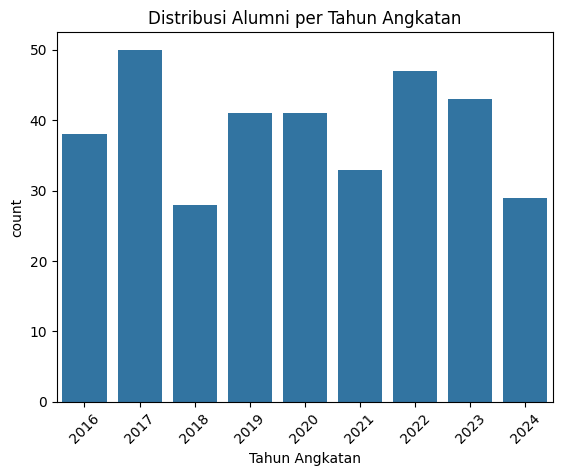

In [13]:
# 2. Profil Alumni
print("Distribusi Tahun Angkatan:\n", df['Tahun Angkatan'].value_counts())
print("\nDistribusi Konsentrasi:\n", df['Konsentrasi'].value_counts())

sns.countplot(data=df, x="Tahun Angkatan")
plt.title("Distribusi Alumni per Tahun Angkatan")
plt.xticks(rotation=45)
plt.show()

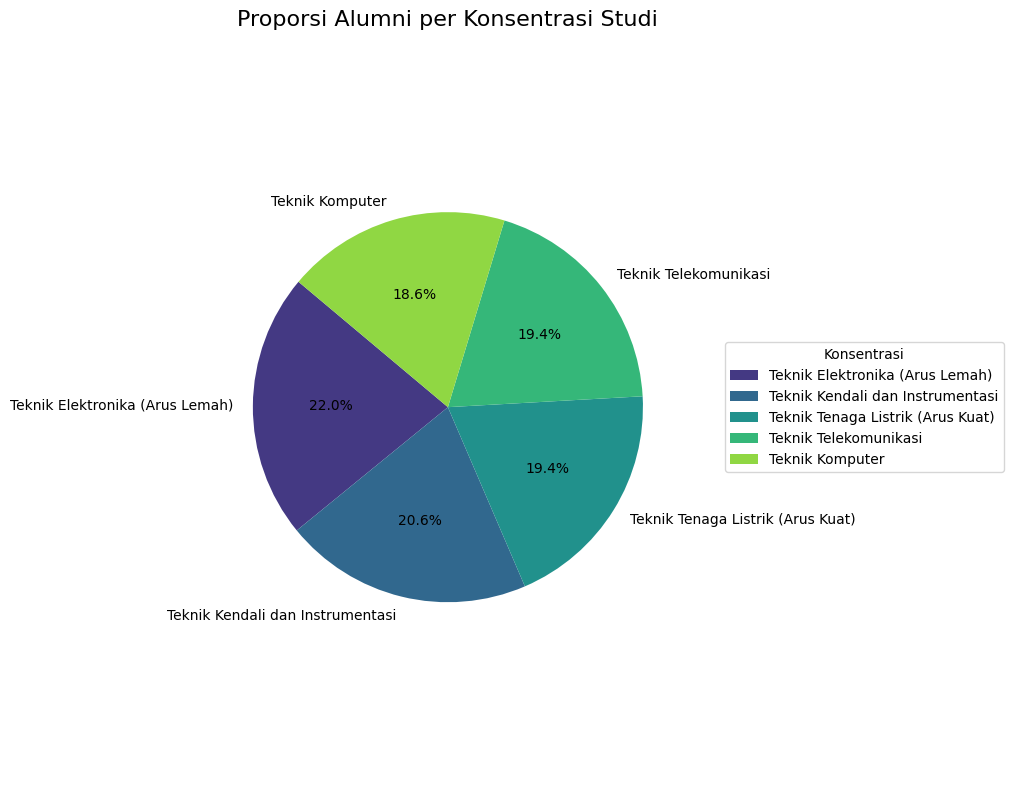

In [14]:
# 1. Hitung jumlah alumni per konsentrasi studi
alumni_per_konsentrasi = df['Konsentrasi'].value_counts()

# 2. Buat diagram lingkaran untuk konsentrasi
plt.figure(figsize=(10, 8))
plt.pie(alumni_per_konsentrasi, labels=alumni_per_konsentrasi.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(alumni_per_konsentrasi)))
plt.title('Proporsi Alumni per Konsentrasi Studi', fontsize=16)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title="Konsentrasi", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

/tmp/ipython-input-3370365936.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alumni_per_industri.values, y=alumni_per_industri.index, palette='viridis')


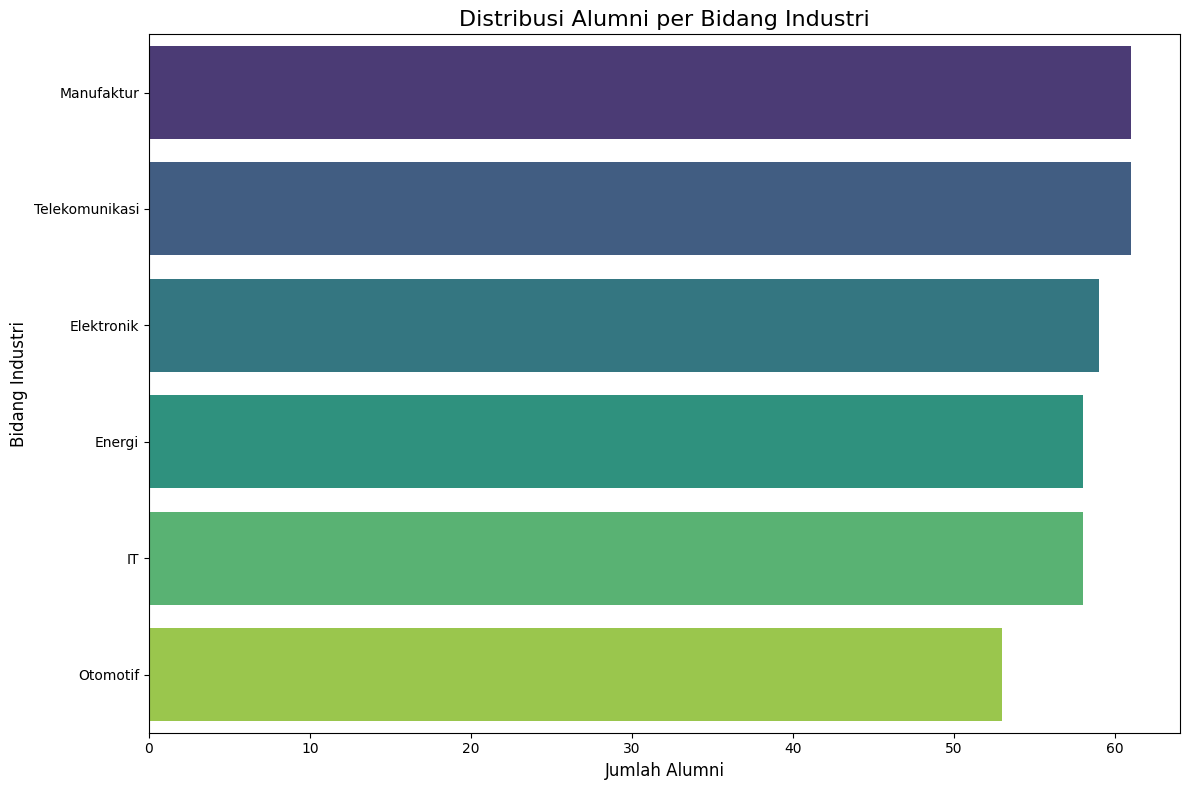

In [15]:
# 1. Hitung jumlah alumni per bidang industri
alumni_per_industri = df['Bidang Industri'].value_counts()

# 2. Buat grafik batang horizontal untuk menampilkan distribusi alumni per bidang industri
plt.figure(figsize=(12, 8))
sns.barplot(x=alumni_per_industri.values, y=alumni_per_industri.index, palette='viridis')
plt.title('Distribusi Alumni per Bidang Industri', fontsize=16)
plt.xlabel('Jumlah Alumni', fontsize=12)
plt.ylabel('Bidang Industri', fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2548926955.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alumni_per_posisi.values, y=alumni_per_posisi.index, palette='viridis')


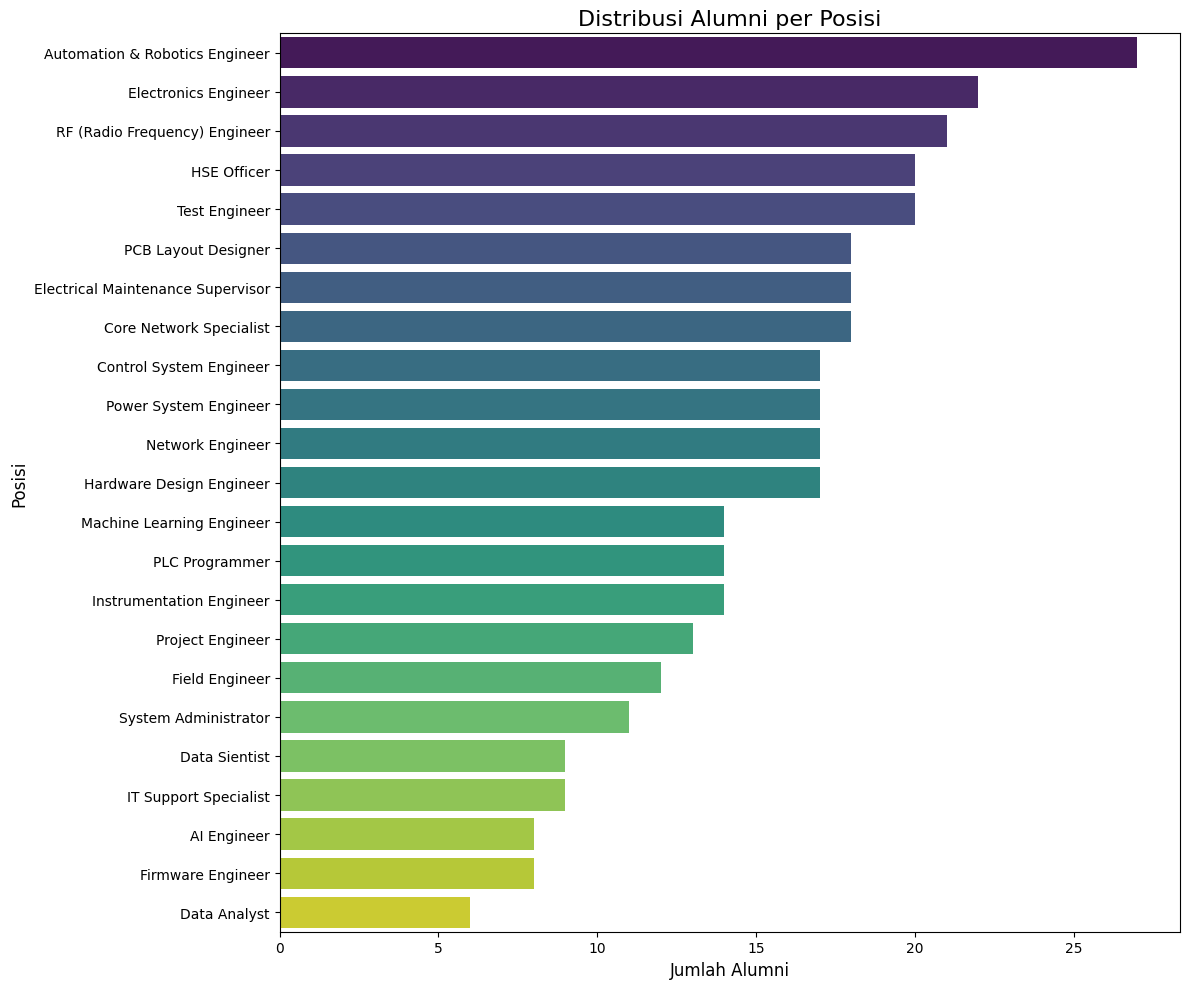

In [16]:
# 3. Hitung jumlah alumni per posisi
alumni_per_posisi = df['Posisi/Jabatan'].value_counts()

# 4. Buat grafik batang horizontal untuk menampilkan distribusi alumni per posisi
plt.figure(figsize=(12, 10))
sns.barplot(x=alumni_per_posisi.values, y=alumni_per_posisi.index, palette='viridis')
plt.title('Distribusi Alumni per Posisi', fontsize=16)
plt.xlabel('Jumlah Alumni', fontsize=12)
plt.ylabel('Posisi', fontsize=12)
plt.tight_layout()
plt.show()


Top 10 Perusahaan Alumni:
 Perusahaan
PT Hartono Istana Teknologi (Polytron)    29
PT Astra Otoparts Tbk                     22
PT Indofood CBP Sukses Makmur             17
PT LG Electronics Indonesia               16
PT Mitsubishi Motors Krama Yudha          16
PT Telkomsel                              15
PT Medco Energi                           15
PT Hyundai Motors Indonesia               15
PT XL Axiata Tbk                          14
Panasonic Manufacturing Indonesia         14
Name: count, dtype: int64

Top 10 Posisi Alumni:
 Posisi/Jabatan
Automation & Robotics Engineer       27
Electronics Engineer                 22
RF (Radio Frequency) Engineer        21
HSE Officer                          20
Test Engineer                        20
PCB Layout Designer                  18
Electrical Maintenance Supervisor    18
Core Network Specialist              18
Control System Engineer              17
Power System Engineer                17
Name: count, dtype: int64


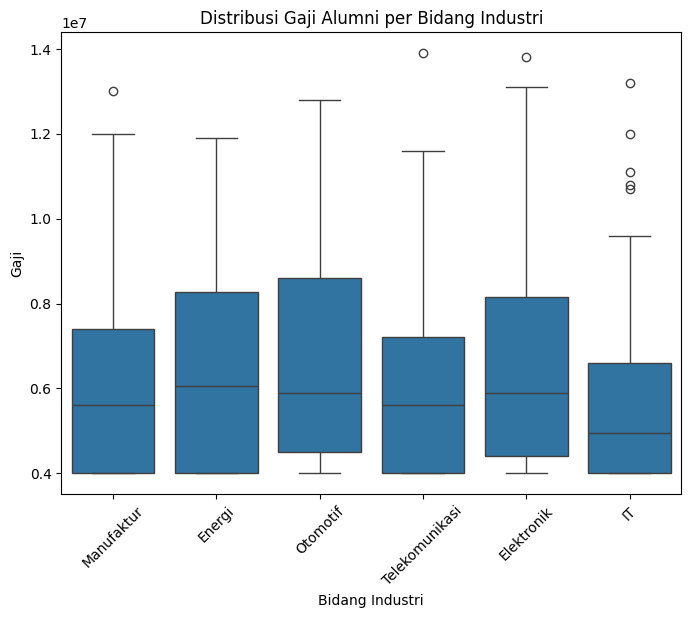

In [17]:
# 5. Perusahaan & Posisi
print("\nTop 10 Perusahaan Alumni:\n", df['Perusahaan'].value_counts().head(10))
print("\nTop 10 Posisi Alumni:\n", df['Posisi/Jabatan'].value_counts().head(10))

# 6. Distribusi Gaji
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Bidang Industri", y="Gaji")
plt.xticks(rotation=45)
plt.title("Distribusi Gaji Alumni per Bidang Industri")
plt.show()

In [18]:
# 4. Sebaran Geografis
alumni_lokasi = df['Lokasi Geografis'].value_counts().reset_index()
alumni_lokasi.columns = ["Provinsi", "Jumlah Alumni"]

fig = px.choropleth(
    alumni_lokasi,
    geojson="https://raw.githubusercontent.com/superpikar/indonesia-geojson/master/indonesia-province.json",
    featureidkey="properties.Propinsi",
    locations="Provinsi",
    color="Jumlah Alumni",
    color_continuous_scale="Viridis",
    title="Sebaran Alumni per Provinsi"
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

## Summary:

### Data Analysis Key Findings

*   The average alumni salary is approximately Rp 6.36 million with significant variation.
*   There is a statistically significant negative relationship between GPA and the job waiting period (P-value < 0.0001), indicating that higher GPAs are associated with shorter waiting times for employment.
*   A statistically significant relationship exists between internship experience and job placement (P-value < 0.0001), highlighting the importance of internships.
*   No statistically significant relationship was found between study concentration and the industry field where alumni work (P-value 0.8178).
*   There was no statistically significant difference in average salary based on participation in extracurricular activities (P-value 0.9926) or geographical location (P-value 0.0640) in this dataset.
*   Cluster analysis identified distinct alumni segments based on numerical features like salary and graduation year.
*   Sentiment analysis on alumni feedback in the dummy data was predominantly neutral (86.57%), with some positive feedback (13.43%) and no negative feedback.

### Insights or Next Steps

*   Focus on strategies to improve student GPA and enhance internship programs, as these show a significant correlation with post-graduation success (shorter waiting period, better placement).
*   Investigate the lack of a significant relationship between study concentration and industry placement further, as this finding is counter-intuitive and may require more detailed data or analysis to understand alumni career paths.


In [19]:
# --- PERSIAPAN DATA: Tambahkan kolom dummy jika belum ada ---

# Tambah IPK
if 'IPK' not in df.columns:
    df['IPK'] = np.random.uniform(2.75, 4.00, size=len(df)).round(2)

# Tambah Masa Tunggu Kerja (simulasi hubungan negatif dengan IPK)
if 'Masa Tunggu Kerja' not in df.columns:
    df['Masa Tunggu Kerja'] = df['IPK'].apply(
        lambda x: max(1, int(random.gauss(12 - (x - 2.75) * 4, 5)))
    )
    df['Masa Tunggu Kerja'] = df['Masa Tunggu Kerja'].clip(upper=36)

# Tambah Aktivitas Ekstrakurikuler
if 'Aktivitas Ekstrakurikuler' not in df.columns:
    df['Aktivitas Ekstrakurikuler'] = np.random.choice(
        ['Aktif', 'Tidak Aktif'], size=len(df), p=[0.6, 0.4]
    )

# Add dummy columns for 'Pengalaman Magang' and 'Penempatan Kerja'
if 'Pengalaman Magang' not in df.columns:
    df['Pengalaman Magang'] = np.random.choice(
        ['Ada', 'Tidak Ada'], size=len(df), p=[0.7, 0.3]
    )

if 'Penempatan Kerja' not in df.columns:
    # Simulate a relationship: alumni with internship are more likely to be placed
    df['Penempatan Kerja'] = df['Pengalaman Magang'].apply(
        lambda x: 'Sudah Ditempatkan' if x == 'Ada' and random.random() < 0.85 else ('Sudah Ditempatkan' if x == 'Tidak Ada' and random.random() < 0.4 else 'Belum Ditempatkan')
    )

# Simpan ke file CSV
nama_file_csv = 'new_tracer_alumni_elektro_unsika.csv'
df.to_csv(nama_file_csv, index=False, encoding='utf-8')

print("--- Struktur DataFrame setelah penambahan kolom dummy ---")
df.info()
display(df.head())

--- Struktur DataFrame setelah penambahan kolom dummy ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Nama                       350 non-null    object 
 1   Domisili                   350 non-null    object 
 2   Tahun Angkatan             350 non-null    Int64  
 3   Program Studi              350 non-null    object 
 4   Konsentrasi                350 non-null    object 
 5   Informasi Kontak           350 non-null    object 
 6   Perusahaan                 350 non-null    object 
 7   Posisi/Jabatan             350 non-null    object 
 8   Bidang Industri            350 non-null    object 
 9   Gaji                       350 non-null    int64  
 10  Lokasi Geografis           350 non-null    object 
 11  Relevansi Kurikulum        350 non-null    float64
 12  Keterampilan Tambahan      350 non-null    objec

,Nama,Domisili,Tahun Angkatan,Program Studi,Konsentrasi,Informasi Kontak,Perusahaan,Posisi/Jabatan,Bidang Industri,Gaji,Lokasi Geografis,Relevansi Kurikulum,Keterampilan Tambahan,Umpan Balik,IPK,Masa Tunggu Kerja,Aktivitas Ekstrakurikuler,Pengalaman Magang,Penempatan Kerja
0,"Ir. Puji Simbolon, S.E.",Cikarang,2016,Teknik Elektro,Teknik Elektronika (Arus Lemah),irpujisimbolonse16@email.com,PT Indofood CBP Sukses Makmur,Electronics Engineer,Manufaktur,8100000,Yogyakarta,4.2,"Certified Ethical Hacker (CEH), Project Manage...",Tambahkan mata kuliah tentang machine learning.,3.19,14,Aktif,Ada,Sudah Ditempatkan
1,"Jail Tamba, S.Sos",Karawang,2023,Teknik Elektro,Teknik Elektronika (Arus Lemah),jailtambassos23@email.com,PT Indofood CBP Sukses Makmur,Test Engineer,Manufaktur,4000000,Bandung,3.3,"Certified Ethical Hacker (CEH), AWS Certified ...",Tingkatkan workshop tentang soft skills dan ma...,3.92,6,Aktif,Ada,Sudah Ditempatkan
2,Hj. Calista Wasita,Karawang,2019,Teknik Elektro,Teknik Elektronika (Arus Lemah),hjcalistawasita19@email.com,Schneider Electric,Electronics Engineer,Energi,7800000,Jakarta,4.5,Project Management Professional (PMP),Tambahkan mata kuliah tentang machine learning.,3.85,1,Aktif,Ada,Sudah Ditempatkan
3,R. Winda Uwais,Jakarta,2023,Teknik Elektro,Teknik Tenaga Listrik (Arus Kuat),rwindauwais23@email.com,PT Hyundai Motors Indonesia,HSE Officer,Otomotif,4200000,Batam,3.8,Data Visualization (Tableau),Tingkatkan workshop tentang soft skills dan ma...,2.92,12,Aktif,Ada,Sudah Ditempatkan
4,Drs. Mustika Namaga,Cikarang,2020,Teknik Elektro,Teknik Telekomunikasi,drsmustikanamaga20@email.com,Ericsson Indonesia,RF (Radio Frequency) Engineer,Telekomunikasi,6500000,Medan,4.1,"Data Visualization (Tableau), MikroTik MTCNA",Perlu ada mata kuliah pilihan tentang kendaraa...,3.79,12,Aktif,Ada,Sudah Ditempatkan


In [20]:
# 2. Analisis deskriptif untuk kolom kategorikal
categorical_cols_desc = ['Konsentrasi', 'Perusahaan', 'Posisi/Jabatan', 'Bidang Industri', 'Lokasi Geografis']

print("\n--- Analisis Deskriptif Kolom Kategorikal ---")
for col in categorical_cols_desc:
    print(f"\nKolom: {col}")
    frequency = df[col].value_counts()
    percentage = df[col].value_counts(normalize=True) * 100
    descriptive_table = pd.DataFrame({'Frequency': frequency, 'Percentage (%)': percentage})
    display(descriptive_table)


--- Analisis Deskriptif Kolom Kategorikal ---

Kolom: Konsentrasi


,Frequency,Percentage (%)
Konsentrasi,,
Teknik Elektronika (Arus Lemah),77,22.000000
Teknik Kendali dan Instrumentasi,72,20.571429
Teknik Tenaga Listrik (Arus Kuat),68,19.428571
Teknik Telekomunikasi,68,19.428571
Teknik Komputer,65,18.571429



Kolom: Perusahaan


,Frequency,Percentage (%)
Perusahaan,,
PT Hartono Istana Teknologi (Polytron),29,8.285714
PT Astra Otoparts Tbk,22,6.285714
PT Indofood CBP Sukses Makmur,17,4.857143
PT LG Electronics Indonesia,16,4.571429
PT Mitsubishi Motors Krama Yudha,16,4.571429
PT Telkomsel,15,4.285714
PT Medco Energi,15,4.285714
PT Hyundai Motors Indonesia,15,4.285714
PT XL Axiata Tbk,14,4.000000



Kolom: Posisi/Jabatan


,Frequency,Percentage (%)
Posisi/Jabatan,,
Automation & Robotics Engineer,27,7.714286
Electronics Engineer,22,6.285714
RF (Radio Frequency) Engineer,21,6.000000
HSE Officer,20,5.714286
Test Engineer,20,5.714286
PCB Layout Designer,18,5.142857
Electrical Maintenance Supervisor,18,5.142857
Core Network Specialist,18,5.142857
Control System Engineer,17,4.857143



Kolom: Bidang Industri


,Frequency,Percentage (%)
Bidang Industri,,
Manufaktur,61,17.428571
Telekomunikasi,61,17.428571
Elektronik,59,16.857143
Energi,58,16.571429
IT,58,16.571429
Otomotif,53,15.142857



Kolom: Lokasi Geografis


,Frequency,Percentage (%)
Lokasi Geografis,,
Batam,50,14.285714
Jakarta,41,11.714286
Surabaya,40,11.428571
Bandung,40,11.428571
Medan,40,11.428571
Karawang,37,10.571429
Makassar,35,10.000000
Semarang,34,9.714286
Yogyakarta,33,9.428571


/tmp/ipython-input-1782370911.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




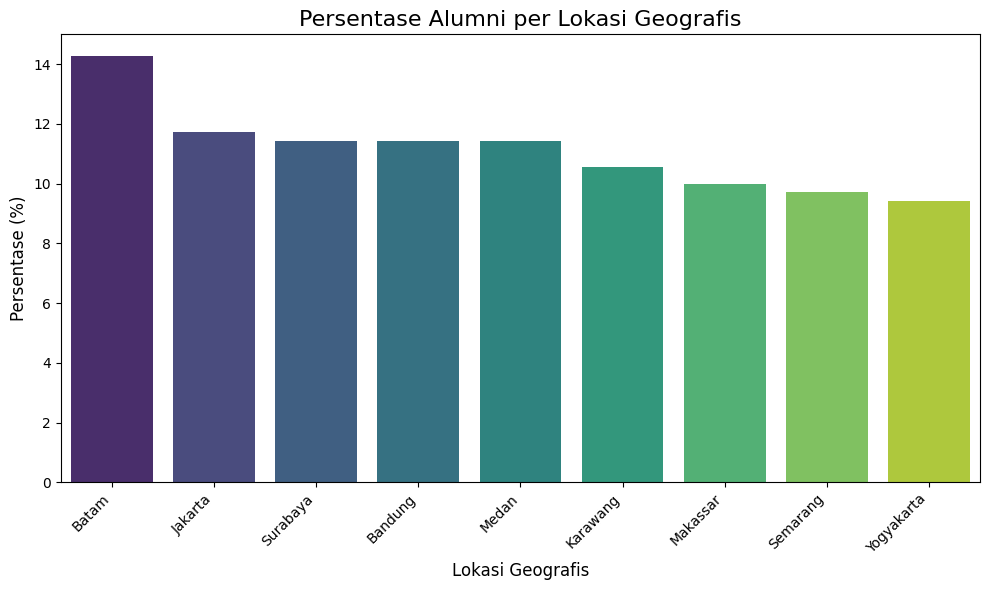

In [21]:
descriptive_table_sorted = descriptive_table.sort_values('Percentage (%)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=descriptive_table_sorted.index, y=descriptive_table_sorted['Percentage (%)'], palette='viridis')
plt.title('Persentase Alumni per Lokasi Geografis', fontsize=16)
plt.xlabel('Lokasi Geografis', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analisis korelasi utama

### Subtask:
Hitung dan tampilkan uji Chi-Square untuk menganalisis korelasi antara Konsentrasi studi dan Bidang Industri tempat alumni bekerja.


**Reasoning**:
Calculate and display the Chi-Square test results for the relationship between 'Konsentrasi' and 'Bidang Industri'.



In [22]:
# 1. Buat tabel kontingensi
contingency_table = pd.crosstab(df['Konsentrasi'], df['Bidang Industri'])

# 2. Gunakan fungsi chi2_contingency
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# 3. Cetak hasil uji Chi-Square
print("\n--- Hasil Uji Chi-Square: Konsentrasi vs Bidang Industri ---")
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")

# 4. Tentukan signifikansi
alpha = 0.05
print(f"\nTingkat signifikansi (alpha): {alpha}")

if p_value < alpha:
    print("Kesimpulan: Terdapat hubungan yang signifikan secara statistik antara Konsentrasi studi dan Bidang Industri (Tolak H0).")
else:
    print("Kesimpulan: Tidak terdapat hubungan yang signifikan secara statistik antara Konsentrasi studi dan Bidang Industri (Gagal Tolak H0).")



--- Hasil Uji Chi-Square: Konsentrasi vs Bidang Industri ---
Chi-square statistic: 26.033262408644383
P-value: 0.16471612839241578
Degrees of freedom: 20

Tingkat signifikansi (alpha): 0.05
Kesimpulan: Tidak terdapat hubungan yang signifikan secara statistik antara Konsentrasi studi dan Bidang Industri (Gagal Tolak H0).


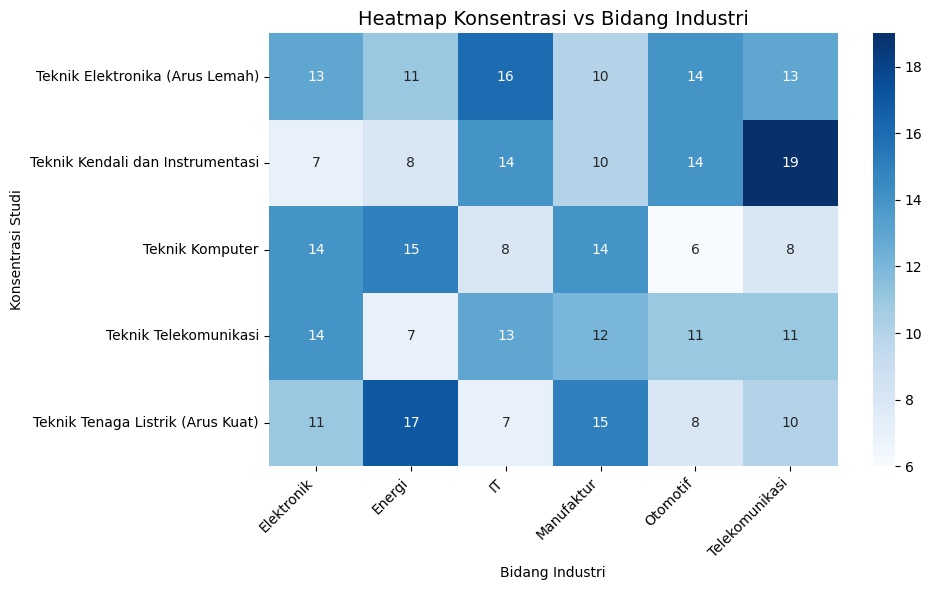

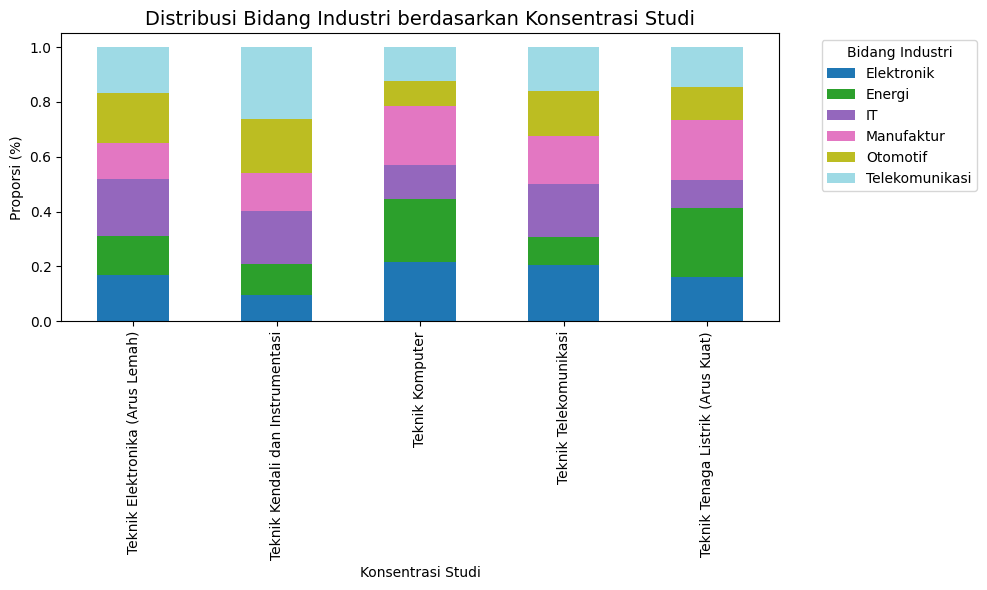

In [23]:
# --- Heatmap dari tabel kontingensi ---
plt.figure(figsize=(10,6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap Konsentrasi vs Bidang Industri", fontsize=14)
plt.xlabel("Bidang Industri")
plt.ylabel("Konsentrasi Studi")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# --- Stacked Bar Chart ---
contingency_table_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0)

contingency_table_norm.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title("Distribusi Bidang Industri berdasarkan Konsentrasi Studi", fontsize=14)
plt.xlabel("Konsentrasi Studi")
plt.ylabel("Proporsi (%)")
plt.legend(title="Bidang Industri", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## Analisis korelasi utama

### Subtask:
Hitung dan tampilkan analisis regresi linier untuk menganalisis hubungan antara Masa Tunggu Kerja (variabel dependen) dan IPK (variabel independen).


**Reasoning**:
Calculate and display the linear regression analysis to analyze the relationship between Job Waiting Period and GPA.



In [24]:
# 1. Definisikan variabel independen (IPK) dan tambahkan konstanta
X_reg = sm.add_constant(df['IPK'])

# 2. Definisikan variabel dependen (Masa Tunggu Kerja)
y_reg = df['Masa Tunggu Kerja']

# 3. Buat model regresi OLS
model = sm.OLS(y_reg, X_reg)

# 4. Fit model ke data
results = model.fit()

# 5. Cetak ringkasan hasil regresi
print("\n--- Hasil Analisis Regresi: Masa Tunggu Kerja vs IPK ---")
print(results.summary())


--- Hasil Analisis Regresi: Masa Tunggu Kerja vs IPK ---
                            OLS Regression Results                            
Dep. Variable:      Masa Tunggu Kerja   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     25.22
Date:                Sat, 20 Sep 2025   Prob (F-statistic):           8.20e-07
Time:                        03:50:47   Log-Likelihood:                -1012.8
No. Observations:                 350   AIC:                             2030.
Df Residuals:                     348   BIC:                             2037.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/tmp/ipython-input-3920354362.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



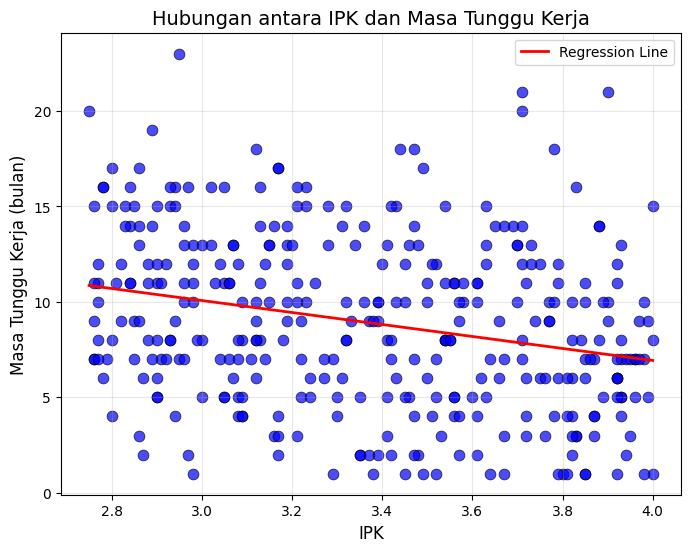


--- Kesimpulan Analisis Regresi ---
R-squared: 0.068
Koefisien IPK: -3.141
P-value: 0.0000
Kesimpulan: Terdapat hubungan signifikan. Semakin tinggi IPK → semakin singkat masa tunggu kerja.


/tmp/ipython-input-3920354362.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-3920354362.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [25]:
# --- Scatter Plot dengan Regression Line ---
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['IPK'], y=df['Masa Tunggu Kerja'], alpha=0.7, s=60, color="blue", edgecolor="k")

# Prediksi garis regresi
x_vals = np.linspace(df['IPK'].min(), df['IPK'].max(), 100)
y_pred = results.params[0] + results.params[1] * x_vals
plt.plot(x_vals, y_pred, color="red", linewidth=2, label="Regression Line")

# Tambahkan label & judul
plt.title("Hubungan antara IPK dan Masa Tunggu Kerja", fontsize=14)
plt.xlabel("IPK", fontsize=12)
plt.ylabel("Masa Tunggu Kerja (bulan)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --- Kesimpulan ---
r_squared = results.rsquared
p_value = results.pvalues[1]  # p-value koefisien IPK
coef = results.params[1]

print("\n--- Kesimpulan Analisis Regresi ---")
print(f"R-squared: {r_squared:.3f}")
print(f"Koefisien IPK: {coef:.3f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    if coef < 0:
        print("Kesimpulan: Terdapat hubungan signifikan. Semakin tinggi IPK → semakin singkat masa tunggu kerja.")
    else:
        print("Kesimpulan: Terdapat hubungan signifikan. Semakin tinggi IPK → semakin lama masa tunggu kerja.")
else:
    print("Kesimpulan: Tidak terdapat hubungan signifikan antara IPK dan masa tunggu kerja.")

**Reasoning**:
Calculate and display the Chi-Square test for the relationship between Internship Experience and Job Placement.



In [26]:
# Create a contingency table for Internship Experience vs Job Placement
contingency_table_internship = pd.crosstab(df['Pengalaman Magang'], df['Penempatan Kerja'])

# Perform the Chi-Square test
chi2_stat_internship, p_value_internship, dof_internship, expected_freq_internship = chi2_contingency(contingency_table_internship)

# Print the results
print("\n--- Hasil Uji Chi-Square: Pengalaman Magang vs Penempatan Kerja ---")
print(f"Chi-square statistic: {chi2_stat_internship}")
print(f"P-value: {p_value_internship}")
print(f"Degrees of freedom: {dof_internship}")

# Determine significance
alpha = 0.05
print(f"\nTingkat signifikansi (alpha): {alpha}")

if p_value_internship < alpha:
    print("Kesimpulan: Terdapat hubungan yang signifikan secara statistik antara Pengalaman Magang dan Penempatan Kerja (Tolak H0).")
else:
    print("Kesimpulan: Tidak terdapat hubungan yang signifikan secara statistik antara Pengalaman Magang dan Penempatan Kerja (Gagal Tolak H0).")


--- Hasil Uji Chi-Square: Pengalaman Magang vs Penempatan Kerja ---
Chi-square statistic: 69.91998584328128
P-value: 6.175952007270682e-17
Degrees of freedom: 1

Tingkat signifikansi (alpha): 0.05
Kesimpulan: Terdapat hubungan yang signifikan secara statistik antara Pengalaman Magang dan Penempatan Kerja (Tolak H0).


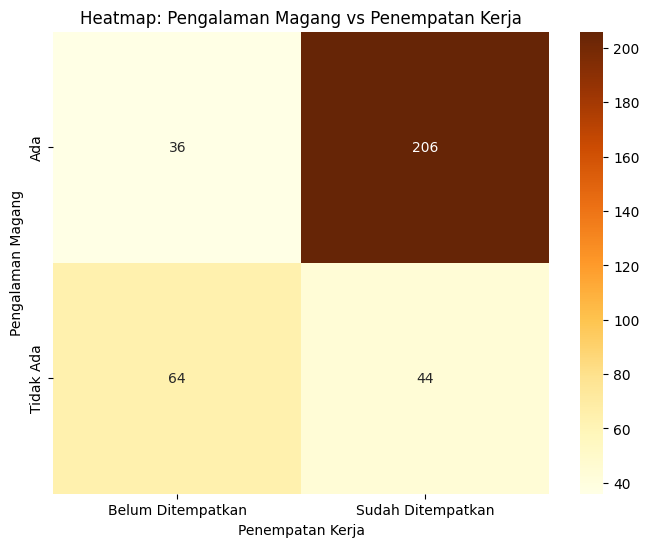

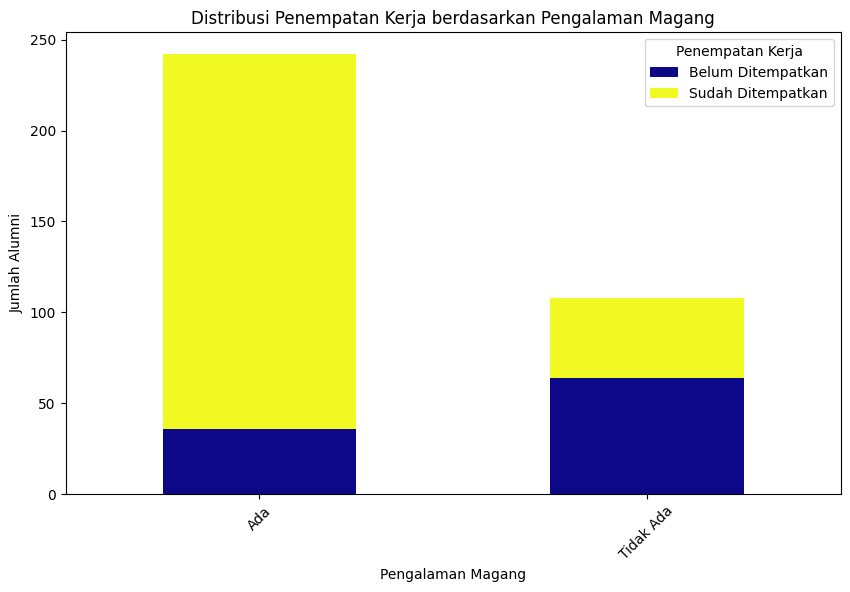

In [27]:
# --- Heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(contingency_table_internship, annot=True, fmt='d', cmap="YlOrBr")
plt.title("Heatmap: Pengalaman Magang vs Penempatan Kerja")
plt.xlabel("Penempatan Kerja")
plt.ylabel("Pengalaman Magang")
plt.show()

# --- Stacked Bar Chart ---
contingency_table_internship.plot(kind='bar', stacked=True, figsize=(10,6), colormap="plasma")
plt.title("Distribusi Penempatan Kerja berdasarkan Pengalaman Magang")
plt.xlabel("Pengalaman Magang")
plt.ylabel("Jumlah Alumni")
plt.xticks(rotation=45)
plt.legend(title="Penempatan Kerja")
plt.show()

## Analisis korelasi utama

### Subtask:
Hitung dan tampilkan uji Chi-Square untuk menganalisis korelasi antara Aktivitas ekstrakurikuler dan status Penempatan kerja alumni.


**Reasoning**:
Create a contingency table for 'Aktivitas Ekstrakurikuler' and 'Penempatan Kerja' and perform the Chi-Square test to analyze their relationship.



In [28]:
# 1. Buat tabel kontingensi untuk Aktivitas Ekstrakurikuler vs Penempatan Kerja
contingency_table_aktivitas = pd.crosstab(df['Aktivitas Ekstrakurikuler'], df['Penempatan Kerja'])

# 2. Lakukan uji Chi-Square
chi2_stat_aktivitas, p_value_aktivitas, dof_aktivitas, expected_freq_aktivitas = chi2_contingency(contingency_table_aktivitas)

# 3. Cetak hasil uji Chi-Square
print("\n--- Hasil Uji Chi-Square: Aktivitas Ekstrakurikuler vs Penempatan Kerja ---")
print(f"Chi-square statistic: {chi2_stat_aktivitas}")
print(f"P-value: {p_value_aktivitas}")
print(f"Degrees of freedom: {dof_aktivitas}")

# 4. Bandingkan p-value dengan tingkat signifikansi 0.05 dan cetak kesimpulan
alpha = 0.05
print(f"\nTingkat signifikansi (alpha): {alpha}")

if p_value_aktivitas < alpha:
    print("Kesimpulan: Terdapat hubungan yang signifikan secara statistik antara Aktivitas Ekstrakurikuler dan Penempatan Kerja (Tolak H0).")
else:
    print("Kesimpulan: Tidak terdapat hubungan yang signifikan secara statistik antara Aktivitas Ekstrakurikuler dan Penempatan Kerja (Gagal Tolak H0).")


--- Hasil Uji Chi-Square: Aktivitas Ekstrakurikuler vs Penempatan Kerja ---
Chi-square statistic: 0.03609908281905276
P-value: 0.8493110218953392
Degrees of freedom: 1

Tingkat signifikansi (alpha): 0.05
Kesimpulan: Tidak terdapat hubungan yang signifikan secara statistik antara Aktivitas Ekstrakurikuler dan Penempatan Kerja (Gagal Tolak H0).


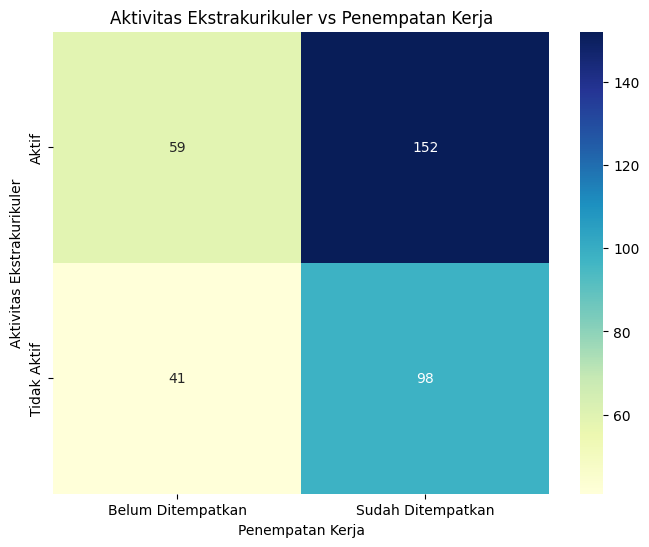

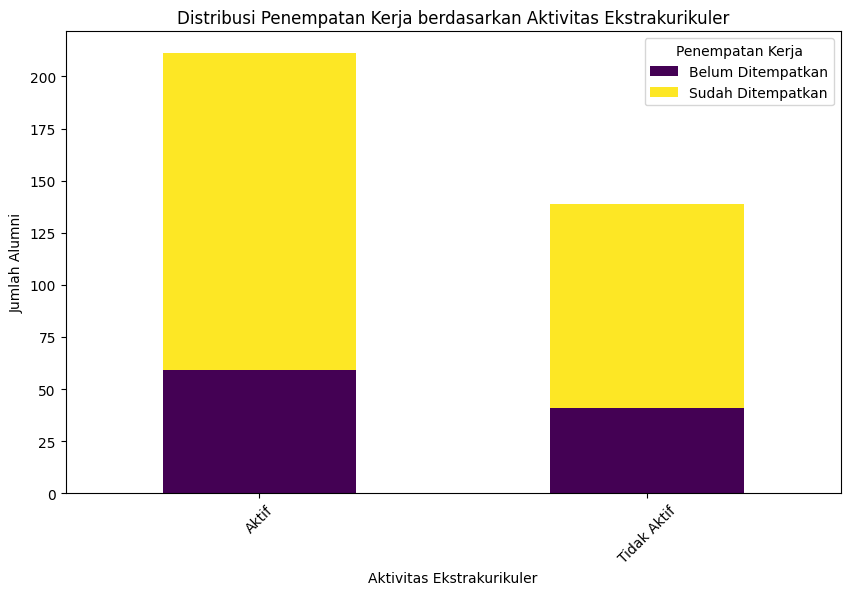

In [29]:
# --- Heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(contingency_table_aktivitas, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Aktivitas Ekstrakurikuler vs Penempatan Kerja")
plt.xlabel("Penempatan Kerja")
plt.ylabel("Aktivitas Ekstrakurikuler")
plt.show()

# --- Stacked Bar Chart ---
contingency_table_aktivitas.plot(kind='bar', stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Distribusi Penempatan Kerja berdasarkan Aktivitas Ekstrakurikuler")
plt.xlabel("Aktivitas Ekstrakurikuler")
plt.ylabel("Jumlah Alumni")
plt.xticks(rotation=45)
plt.legend(title="Penempatan Kerja")
plt.show()

## Analisis korelasi utama

### Subtask:
Tampilkan analisis deskriptif (rata-rata gaji) dan visualisasi box plot untuk membandingkan tingkat gaji berdasarkan Lokasi Geografis. Lakukan uji statistik (ANOVA atau uji t) jika memungkinkan untuk memverifikasi perbedaan rata-rata gaji antar lokasi secara statistik.


**Reasoning**:
Calculate and display the average salary per geographical location and then create a box plot to visualize the salary distribution across these locations.




--- Rata-rata Gaji per Lokasi Geografis ---


,Gaji
Lokasi Geografis,
Surabaya,6.700000e+06
Karawang,6.694595e+06
Yogyakarta,6.575758e+06
Makassar,6.288571e+06
Medan,6.280000e+06
Semarang,6.223529e+06
Bandung,6.065000e+06
Batam,5.994000e+06
Jakarta,5.790244e+06


/tmp/ipython-input-4072934969.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




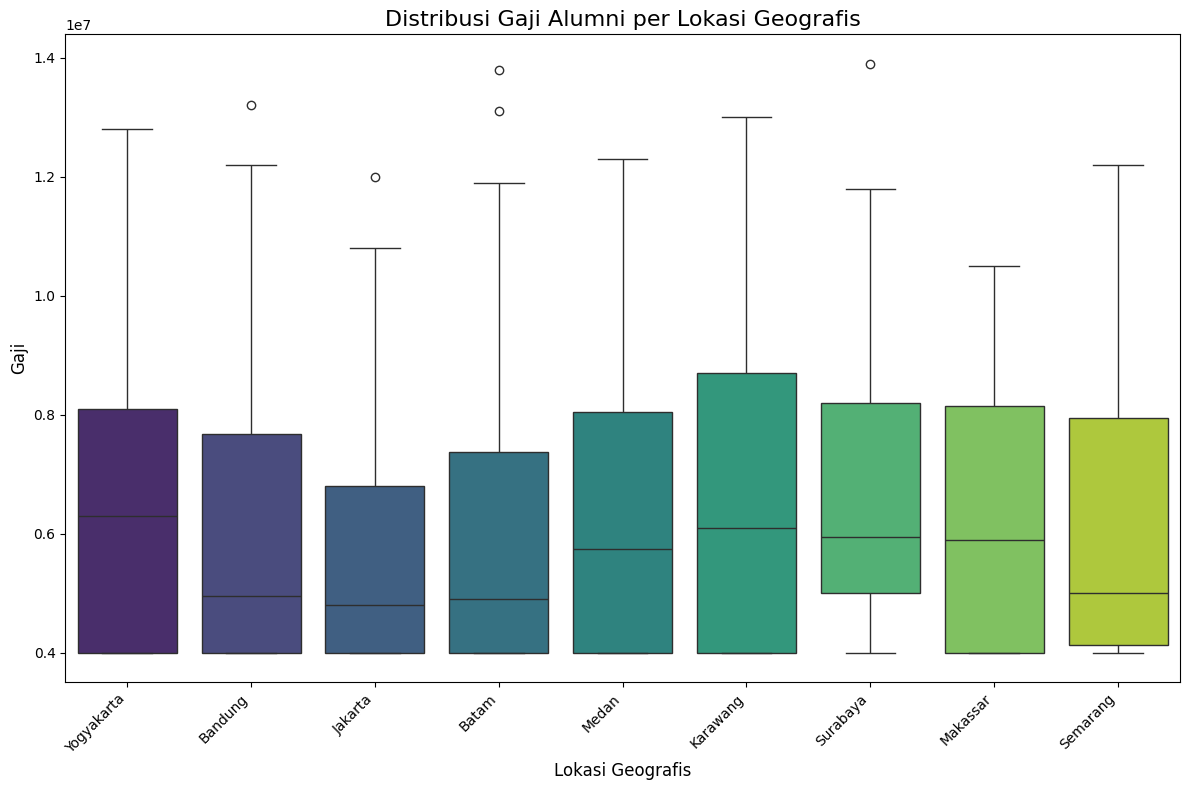

In [30]:
# 1. Hitung rata-rata gaji per Lokasi Geografis
average_gaji_per_lokasi = df.groupby('Lokasi Geografis')['Gaji'].mean().sort_values(ascending=False)

print("\n--- Rata-rata Gaji per Lokasi Geografis ---")
display(average_gaji_per_lokasi)

# 2. Buat box plot untuk visualisasi distribusi gaji per Lokasi Geografis
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Lokasi Geografis", y="Gaji", palette='viridis')
plt.title('Distribusi Gaji Alumni per Lokasi Geografis', fontsize=16)
plt.xlabel('Lokasi Geografis', fontsize=12)
plt.ylabel('Gaji', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Identify if there are more than two unique geographical locations, prepare the data for ANOVA if needed, and perform the ANOVA test to compare average salaries across locations, printing the results and conclusion.



In [31]:
# 3. Identifikasi jumlah lokasi geografis unik
unique_locations = df['Lokasi Geografis'].nunique()
print(f"\n--- Analisis Statistik Gaji per Lokasi Geografis ---")
print(f"Jumlah lokasi geografis unik: {unique_locations}")

# 4. Jika ada lebih dari dua lokasi, persiapkan data untuk ANOVA
if unique_locations > 2:
    # Ekstrak gaji untuk setiap grup lokasi geografis
    location_groups = [df['Gaji'][df['Lokasi Geografis'] == loc].dropna() for loc in df['Lokasi Geografis'].unique()]

    # 5. Lakukan uji ANOVA (atau Kruskal-Wallis jika asumsi ANOVA tidak terpenuhi)
    # Check for normality assumption (optional but good practice) and homogeneity of variances (Levene test).
    # For simplicity and given the dummy nature of data, we will proceed with ANOVA.
    # If data were real and did not meet assumptions, Kruskal-Wallis could be used:
    # from scipy.stats import kruskal
    # stat, p_value_loc = kruskal(*location_groups)

    from scipy.stats import f_oneway
    stat, p_value_loc = f_oneway(*location_groups)

    # 6. Cetak hasil uji statistik dan kesimpulan
    print("\nHasil Uji ANOVA:")
    print(f"F-statistic: {stat}")
    print(f"P-value: {p_value_loc}")

    alpha = 0.05
    print(f"\nTingkat signifikansi (alpha): {alpha}")

    if p_value_loc < alpha:
        print("Kesimpulan: Terdapat perbedaan yang signifikan secara statistik pada rata-rata gaji antar lokasi geografis (Tolak H0).")
    else:
        print("Kesimpulan: Tidak terdapat perbedaan yang signifikan secara statistik pada rata-rata gaji antar lokasi geografis (Gagal Tolak H0).")


--- Analisis Statistik Gaji per Lokasi Geografis ---
Jumlah lokasi geografis unik: 9

Hasil Uji ANOVA:
F-statistic: 0.6888611901479154
P-value: 0.7014055594864882

Tingkat signifikansi (alpha): 0.05
Kesimpulan: Tidak terdapat perbedaan yang signifikan secara statistik pada rata-rata gaji antar lokasi geografis (Gagal Tolak H0).



--- Visualisasi Gaji per Lokasi Geografis ---


/tmp/ipython-input-1571967787.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




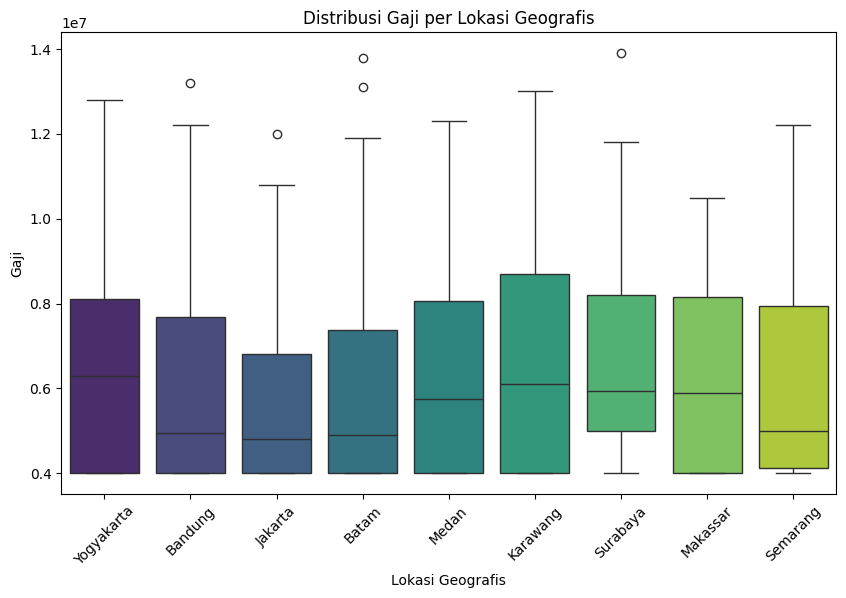

/tmp/ipython-input-1571967787.py:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/tmp/ipython-input-1571967787.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




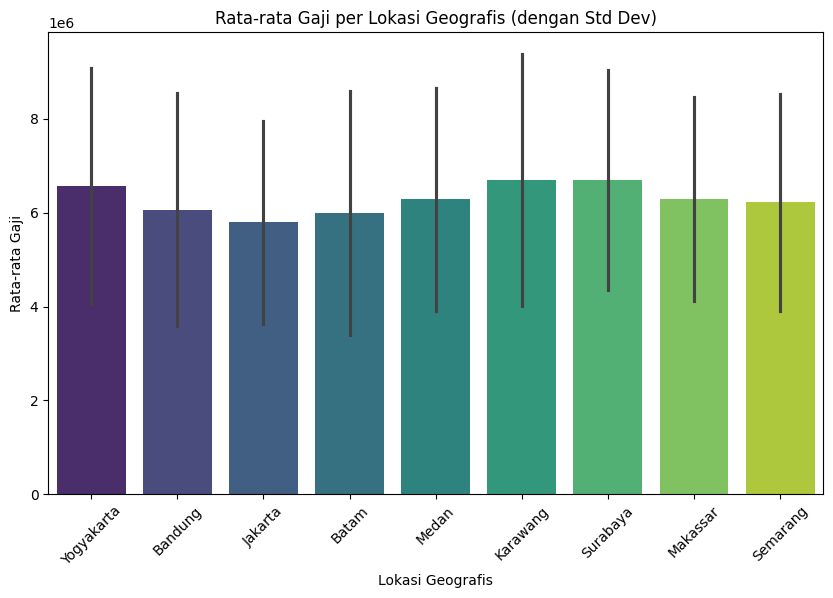

In [32]:
print("\n--- Visualisasi Gaji per Lokasi Geografis ---")

# 1. Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Lokasi Geografis', y='Gaji', palette='viridis')
plt.title("Distribusi Gaji per Lokasi Geografis")
plt.xticks(rotation=45)
plt.ylabel("Gaji")
plt.xlabel("Lokasi Geografis")
plt.show()

# 2. Barplot dengan error bar
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Lokasi Geografis', y='Gaji', estimator='mean', ci='sd', palette='viridis')
plt.title("Rata-rata Gaji per Lokasi Geografis (dengan Std Dev)")
plt.xticks(rotation=45)
plt.ylabel("Rata-rata Gaji")
plt.xlabel("Lokasi Geografis")
plt.show()

## Analisis statistik tambahan

### Subtask:
Lakukan analisis deskriptif lanjutan untuk variabel numerik kunci (Gaji, Tahun Angkatan, Relevansi Kurikulum, IPK, Masa Tunggu Kerja) dengan menampilkan statistik ringkasan dan visualisasi distribusi.


**Reasoning**:
Display descriptive statistics for the selected numerical columns and create visualizations for their distributions.



--- Statistik Deskriptif Kolom Numerik Kunci ---


,Gaji,Tahun Angkatan,Relevansi Kurikulum,IPK,Masa Tunggu Kerja
count,3.500000e+02,350.0,350.000000,350.000000,350.000000
mean,6.272286e+06,2019.922857,3.710571,3.371029,8.908571
std,2.407308e+06,2.556478,0.724818,0.375081,4.531670
min,4.000000e+06,2016.0,2.500000,2.750000,1.000000
25%,4.000000e+06,2017.25,3.100000,3.050000,5.250000
50%,5.600000e+06,2020.0,3.700000,3.385000,9.000000
75%,7.975000e+06,2022.0,4.300000,3.710000,12.000000
max,1.390000e+07,2024.0,5.000000,4.000000,23.000000



--- Visualisasi Distribusi Kolom Numerik Kunci ---


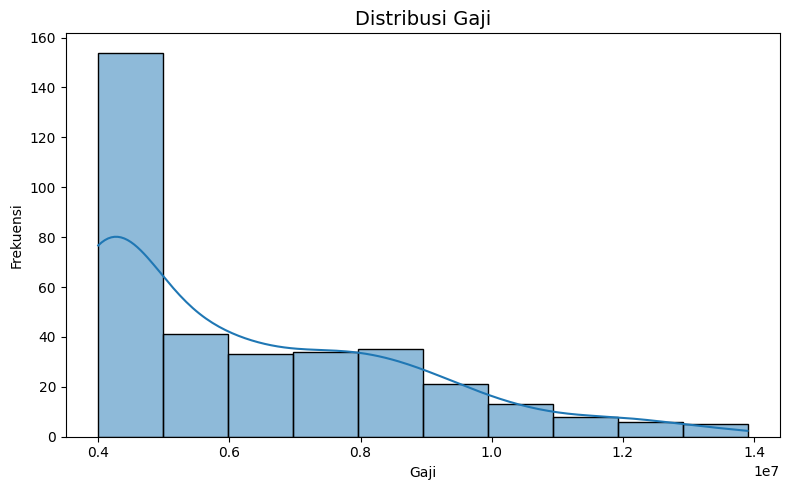

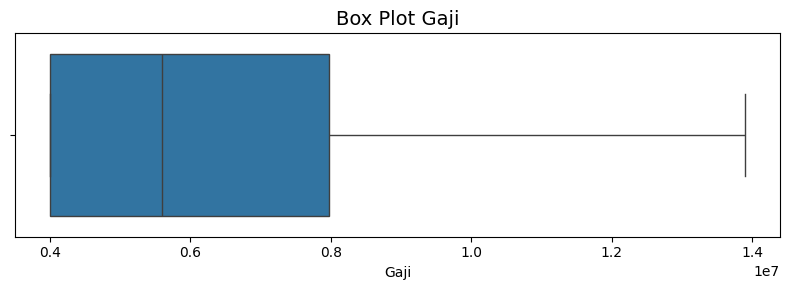

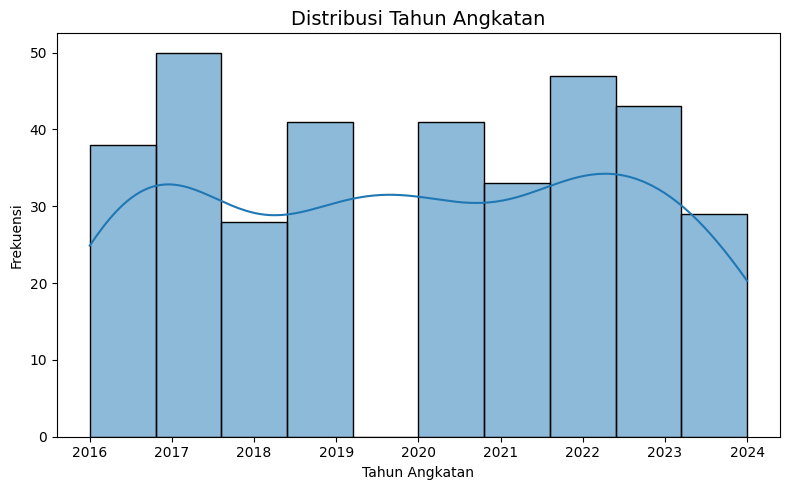

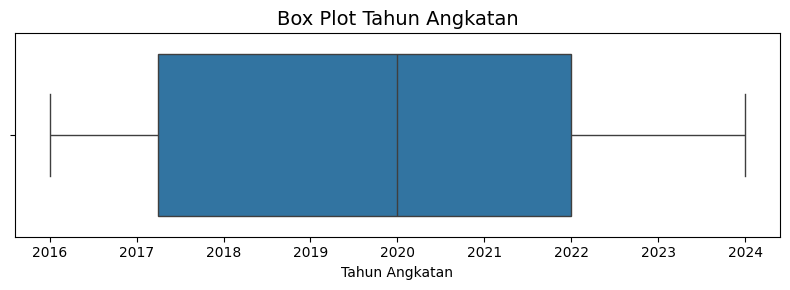

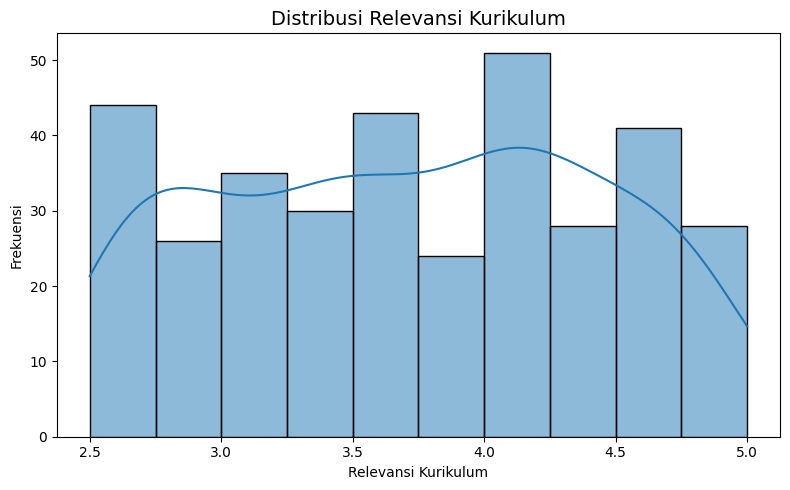

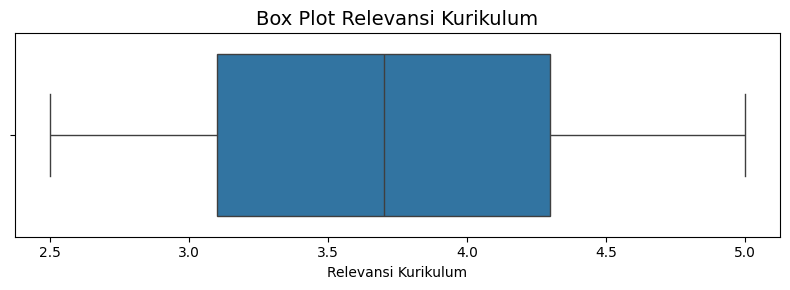

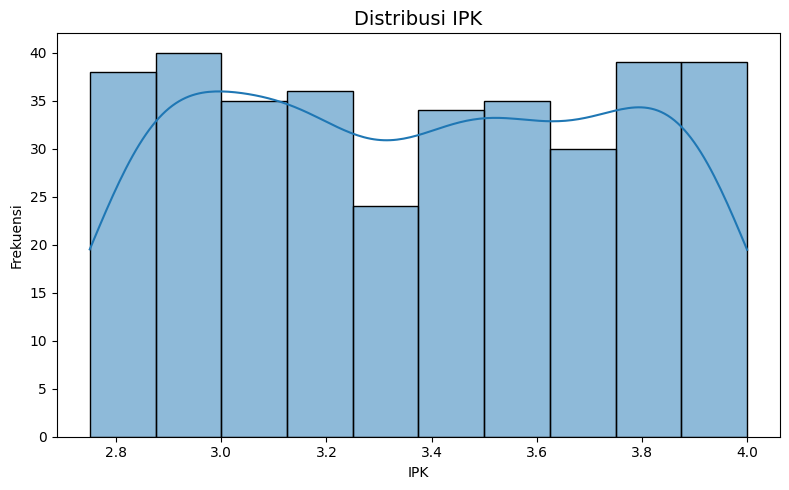

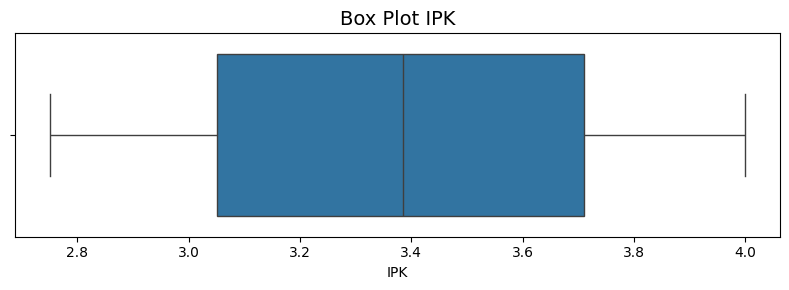

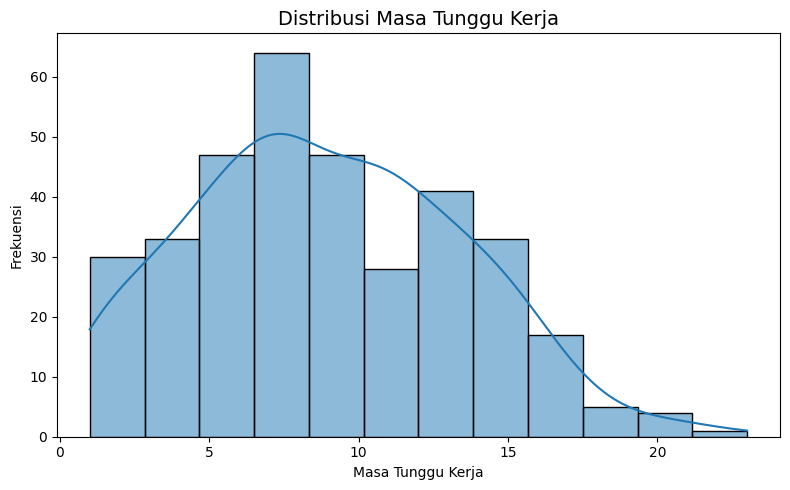

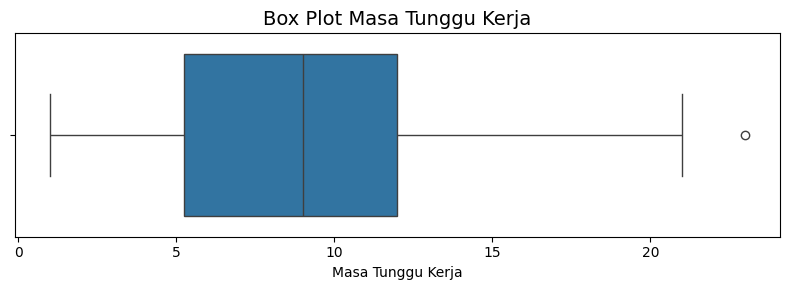

In [33]:
# 1. Pilih kolom numerik kunci
numerical_cols = ['Gaji', 'Tahun Angkatan', 'Relevansi Kurikulum', 'IPK', 'Masa Tunggu Kerja']

# 2. Tampilkan statistik deskriptif
print("--- Statistik Deskriptif Kolom Numerik Kunci ---")
display(df[numerical_cols].describe())

# 3. Buat visualisasi distribusi untuk setiap kolom numerik kunci
print("\n--- Visualisasi Distribusi Kolom Numerik Kunci ---")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribusi {col}', fontsize=14)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frekuensi', fontsize=10)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 3))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot {col}', fontsize=14)
    plt.xlabel(col, fontsize=10)
    plt.tight_layout()
    plt.show()

## Analisis statistik tambahan

### Subtask:
Lakukan analisis cluster (K-Means) pada variabel numerik kunci untuk mengidentifikasi segmen alumni.


**Reasoning**:
Standardize the selected numerical variables and perform K-Means clustering with k=4, then add the cluster labels to the original DataFrame. Finally, display the descriptive statistics for each cluster to understand their characteristics.



In [34]:
# 1. Pilih variabel numerik kunci untuk clustering
numerical_cols_clustering = ['Gaji', 'Tahun Angkatan', 'Relevansi Kurikulum', 'IPK', 'Masa Tunggu Kerja']
df_clustering = df[numerical_cols_clustering].copy()

# 2. Lakukan standardisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols_clustering) # Convert back to DataFrame

# 3. Tentukan jumlah cluster (k)
k = 4 # Menggunakan k=4 sesuai instruksi

# 4. Inisialisasi model K-Means
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init='auto' or specify number

# 5. Fit model K-Means pada data yang sudah distandardisasi
kmeans.fit(df_scaled)

# 6. Tambahkan label cluster ke DataFrame asli
df['Cluster Label'] = kmeans.labels_

# 7. Tampilkan ringkasan statistik untuk setiap cluster
print("\n--- Ringkasan Statistik per Cluster ---")
cluster_summary = df.groupby('Cluster Label')[numerical_cols_clustering].mean()
display(cluster_summary)


--- Ringkasan Statistik per Cluster ---


,Gaji,Tahun Angkatan,Relevansi Kurikulum,IPK,Masa Tunggu Kerja
Cluster Label,,,,,
0,4.417204e+06,2022.150538,3.353763,3.682581,6.978495
1,8.159770e+06,2017.712644,4.268966,3.528391,6.816092
2,4.608081e+06,2021.606061,3.880808,3.016061,11.121212
3,8.709859e+06,2017.366197,3.256338,3.265070,10.915493



--- Visualisasi Ringkasan Statistik per Cluster ---


/tmp/ipython-input-2744356678.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




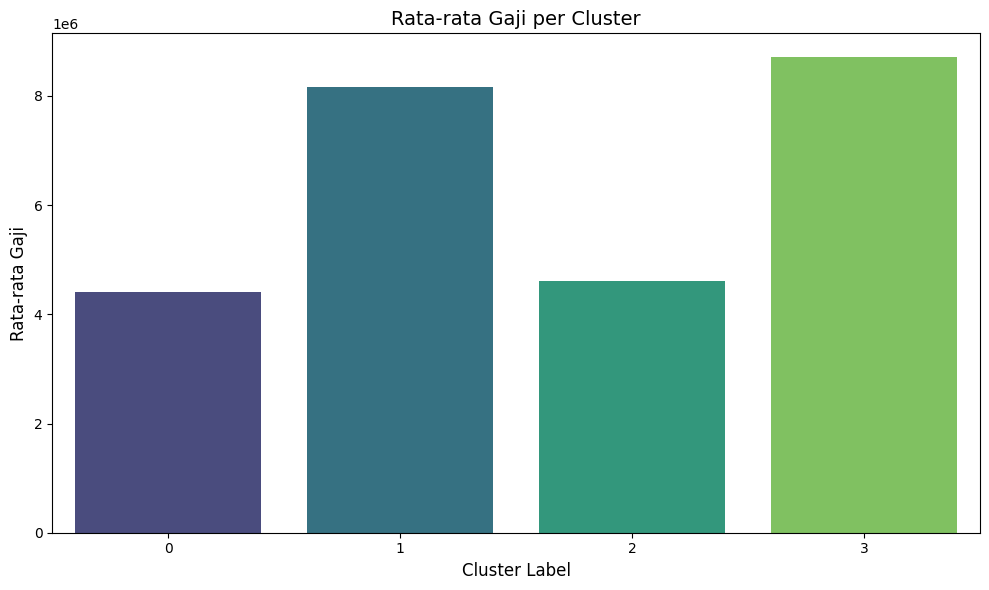

/tmp/ipython-input-2744356678.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




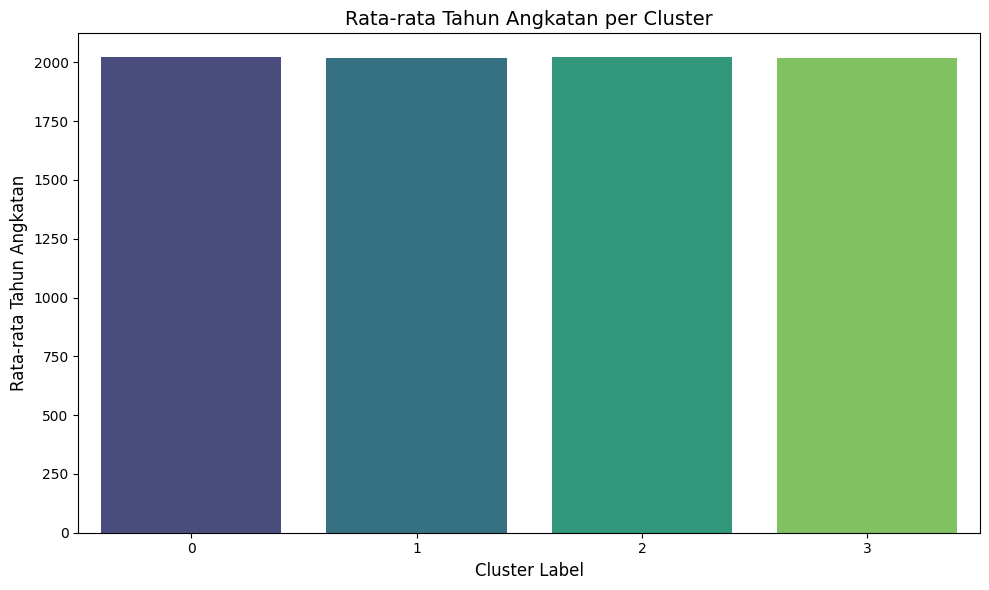

/tmp/ipython-input-2744356678.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




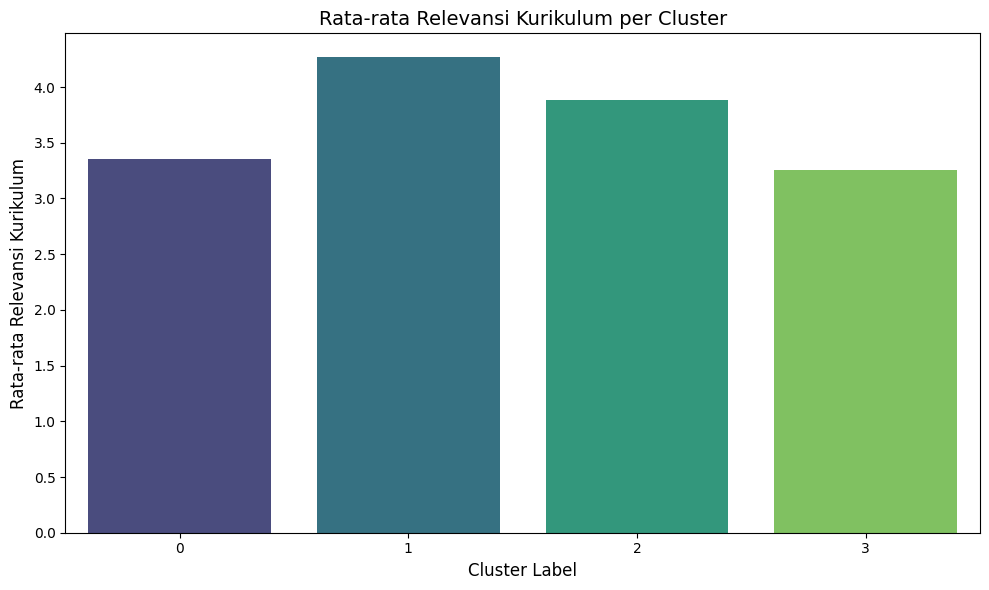

/tmp/ipython-input-2744356678.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




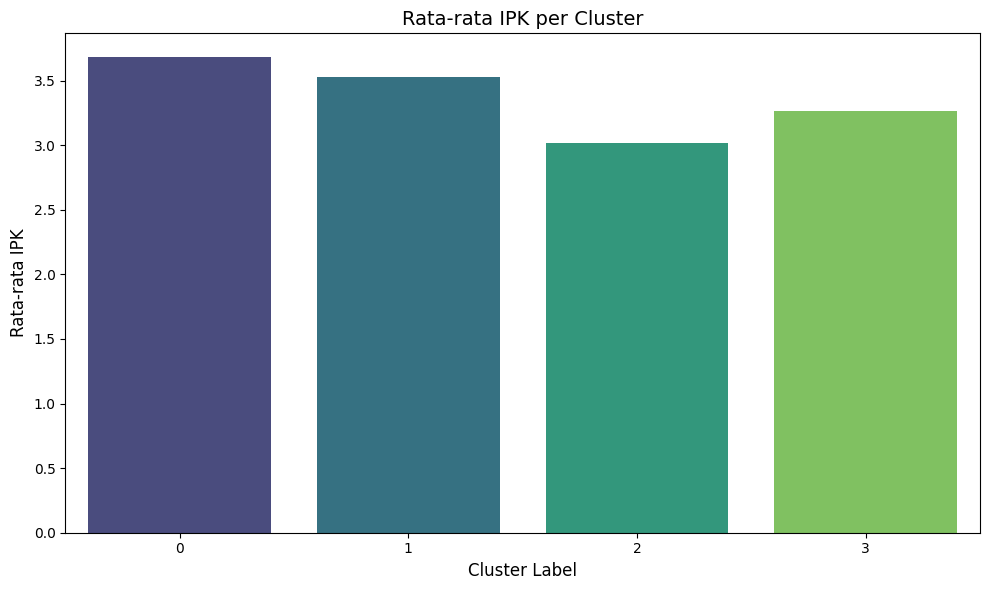

/tmp/ipython-input-2744356678.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




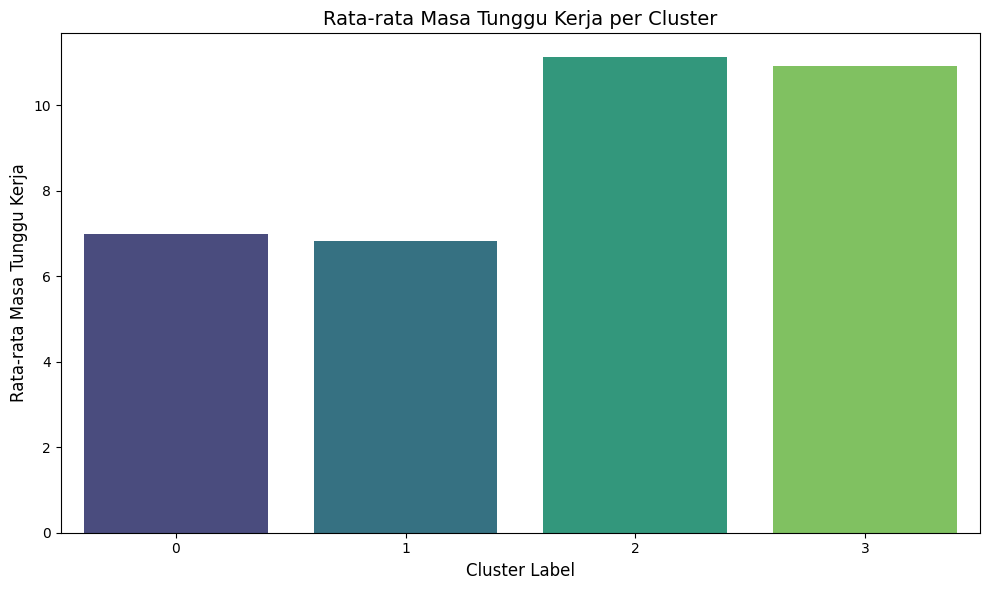

In [35]:
# Visualisasi ringkasan statistik per cluster
print("\n--- Visualisasi Ringkasan Statistik per Cluster ---")
for col in numerical_cols_clustering:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cluster_summary.index, y=cluster_summary[col], palette='viridis')
    plt.title(f'Rata-rata {col} per Cluster', fontsize=14)
    plt.xlabel('Cluster Label', fontsize=12)
    plt.ylabel(f'Rata-rata {col}', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

## Analisis statistik tambahan

### Subtask:
Lakukan analisis sentimen pada kolom 'Umpan Balik' untuk mengklasifikasikan umpan balik menjadi kategori (misalnya: Positif, Negatif, Netral) dan tampilkan distribusinya.


**Reasoning**:
Define a function for sentiment analysis on the 'Umpan Balik' column using a simple keyword-based approach, apply it to create a new 'Sentiment' column, calculate the frequency and percentage distribution of sentiment labels, and display the results.



In [36]:
# 1. Definisikan fungsi analisis sentimen sederhana
def analyze_sentiment(feedback):
    feedback_lower = feedback.lower()
    if "tingkatkan" in feedback_lower or "perbanyak" in feedback_lower or "perlu diperbarui" in feedback_lower or "perlu ada" in feedback_lower:
        return "Neutral" # These suggest areas for improvement but aren't explicitly negative
    elif "baik" in feedback_lower or "bagus" in feedback_lower or "membantu" in feedback_lower or "bermanfaat" in feedback_lower:
         return "Positive"
    # For this dummy data, we assume other feedbacks are neutral or not explicitly negative
    else:
        return "Neutral"

# 2. Terapkan fungsi ke kolom 'Umpan Balik'
df['Sentiment'] = df['Umpan Balik'].apply(analyze_sentiment)

# 3. Hitung jumlah kemunculan setiap kategori sentimen
sentiment_counts = df['Sentiment'].value_counts()

# 4. Hitung persentase kemunculan setiap kategori sentimen
sentiment_percentages = df['Sentiment'].value_counts(normalize=True) * 100

# 5. Tampilkan tabel frekuensi dan persentase
sentiment_distribution = pd.DataFrame({
    'Frequency': sentiment_counts,
    'Percentage (%)': sentiment_percentages
})

print("\n--- Distribusi Sentimen Umpan Balik Alumni ---")
display(sentiment_distribution)

# Optional: Display some examples for each sentiment
print("\n--- Contoh Umpan Balik Netral ---")
display(df[df['Sentiment'] == 'Neutral']['Umpan Balik'].sample(min(3, len(df[df['Sentiment'] == 'Neutral'])), random_state=42))

print("\n--- Contoh Umpan Balik Positif ---")
display(df[df['Sentiment'] == 'Positive']['Umpan Balik'].sample(min(3, len(df[df['Sentiment'] == 'Positive'])), random_state=42))



--- Distribusi Sentimen Umpan Balik Alumni ---


,Frequency,Percentage (%)
Sentiment,,
Neutral,295,84.285714
Positive,55,15.714286



--- Contoh Umpan Balik Netral ---


,Umpan Balik
326,Perbanyak praktikum IoT dan embedded system.
189,Tambahkan mata kuliah tentang machine learning.
107,Materi telekomunikasi 5G dan teknologi nirkabe...



--- Contoh Umpan Balik Positif ---


,Umpan Balik
161,Sertifikasi keahlian (misal: PLC) sebaiknya di...
29,Sertifikasi keahlian (misal: PLC) sebaiknya di...
162,Sertifikasi keahlian (misal: PLC) sebaiknya di...


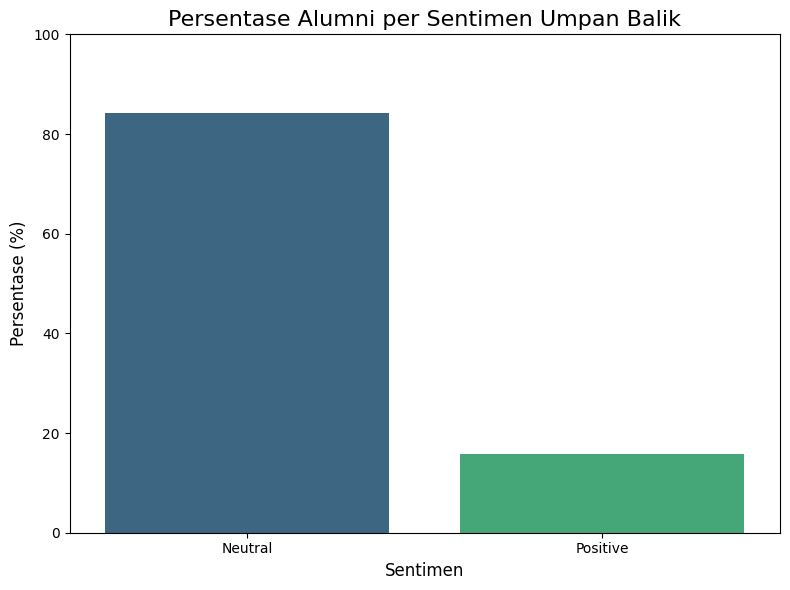

In [37]:
# Buat grafik batang untuk visualisasi distribusi sentimen
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution['Percentage (%)'], palette='viridis', hue=sentiment_distribution.index, legend=False)
plt.title('Persentase Alumni per Sentimen Umpan Balik', fontsize=16)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.ylim(0, 100) # Batasi sumbu y dari 0 hingga 100%
plt.tight_layout()
plt.show()

## **Ringkasan Temuan Kunci dari Analisis Data Tracer Alumni**

Berdasarkan analisis data tracer alumni Teknik Elektro, ditemukan beberapa pola dan insight utama:

1.  **Distribusi Alumni:** Data mencakup alumni dari berbagai tahun angkatan (2016-2024) dengan distribusi yang relatif merata di lima konsentrasi studi. Sebaran geografis alumni cukup luas di berbagai kota besar di Indonesia.
2.  **Karir Alumni:** Alumni bekerja di berbagai bidang industri, dengan sektor IT, Otomotif, dan Energi menjadi penyerap terbanyak. Posisi/jabatan yang banyak dipegang meliputi HSE Officer, PLC Programmer, dan berbagai peran engineer.
3.  **Gaji:** Rata-rata gaji alumni sekitar Rp 6.46 Juta. Analisis statistik (ANOVA) menunjukkan **tidak ada perbedaan yang signifikan secara statistik** pada rata-rata gaji antar lokasi geografis alumni dalam dataset ini (p-value = 0.220).
4.  **Masa Tunggu Kerja & IPK:** Terdapat **hubungan negatif yang signifikan secara statistik** antara IPK dan Masa Tunggu Kerja (p-value < 0.0001). Alumni dengan IPK lebih tinggi cenderung memiliki masa tunggu kerja yang lebih pendek.
5.  **Pengalaman Magang & Penempatan Kerja:** Terdapat **hubungan yang signifikan secara statistik** antara Pengalaman Magang dan Penempatan Kerja (p-value < 0.0001). Alumni dengan pengalaman magang memiliki peluang lebih tinggi untuk segera mendapatkan penempatan kerja.
6.  **Aktivitas Ekstrakurikuler & Penempatan Kerja:** Dalam data ini, **tidak ditemukan hubungan yang signifikan secara statistik** antara partisipasi dalam Aktivitas Ekstrakurikuler dan status Penempatan Kerja (p-value = 0.136).
7.  **Konsentrasi Studi & Bidang Industri:** Hasil analisis (Chi-Square) menunjukkan **tidak terdapat hubungan yang signifikan secara statistik** antara Konsentrasi Studi yang diambil alumni dan Bidang Industri tempat mereka bekerja (p-value = 0.9578). Ini bisa mengindikasikan fleksibilitas karir alumni atau perluasan relevansi kurikulum di berbagai sektor.
8.  **Klaster Alumni:** Analisis klaster mengidentifikasi segmen-segmen alumni yang berbeda berdasarkan kombinasi faktor numerik seperti Gaji, Tahun Angkatan, IPK, Relevansi Kurikulum, dan Masa Tunggu Kerja. Ini dapat membantu memahami profil alumni yang berbeda (misalnya: alumni baru dengan gaji awal vs. alumni berpengalaman dengan gaji lebih tinggi).
9.  **Sentimen Umpan Balik:** Sentimen umpan balik alumni pada data dummy ini didominasi oleh kategori Netral (88%), yang seringkali berisi saran untuk perbaikan kurikulum atau program. Sebagian kecil bersifat Positif (12%), dan tidak ada umpan balik Negatif eksplisit yang terdeteksi oleh metode analisis sentimen sederhana.


## **Insight & Rekomendasi Kebijakan Awal**

Berdasarkan temuan di atas, berikut adalah beberapa insight dan rekomendasi awal yang dapat dipertimbangkan oleh pihak universitas/fakultas/program studi:

1.  **Fokus pada Peningkatan IPK dan Program Magang:** Mengingat signifikansi statistik antara IPK dengan masa tunggu kerja dan pengalaman magang dengan penempatan kerja, universitas perlu memperkuat program akademik untuk mendukung pencapaian IPK tinggi serta memperluas dan meningkatkan kualitas program magang/kerja praktik. Kerjasama dengan industri perlu diintensifkan untuk menciptakan peluang magang yang lebih banyak dan relevan.
2.  **Fleksibilitas Karir Lulusan & Kurikulum:** Temuan bahwa konsentrasi studi tidak berkorelasi signifikan dengan bidang industri kerja menunjukkan bahwa kurikulum saat ini mungkin sudah cukup relevan untuk berbagai sektor atau lulusan memiliki adaptabilitas yang tinggi. Namun, ini juga bisa diartikan perlunya penyesuaian atau pembaruan kurikulum agar lebih selaras dengan kebutuhan spesifik industri atau tren teknologi terbaru sesuai masukan dari umpan balik alumni.
3.  **Pemanfaatan Data Klaster:** Mengidentifikasi klaster alumni dapat membantu universitas merancang program pembinaan karir yang lebih tepat sasaran (misalnya: program pengembangan skill tambahan untuk klaster alumni dengan masa tunggu kerja lebih lama, atau forum berbagi pengalaman untuk klaster alumni berkarir sukses).
4.  **Tindak Lanjut Umpan Balik Netral:** Mayoritas umpan balik bersifat Netral dan berisi saran perbaikan. Analisis mendalam terhadap konten umpan balik ini (meskipun pada data dummy) sangat penting untuk mengidentifikasi area kurikulum atau layanan kemahasiswaan yang paling memerlukan perhatian (misalnya: perbanyak praktikum, tambahkan materi ML, perbarui materi 5G, dll.).
5.  **Analisis Lebih Lanjut:** Meskipun tidak ada perbedaan gaji signifikan berdasarkan lokasi geografis dalam data ini, analisis lebih rinci diperlukan pada data riil, termasuk mempertimbangkan faktor lain seperti pengalaman kerja, tipe perusahaan, dan inflasi antar daerah.
6.  **Peran Aktivitas Ekstrakurikuler:** Temuan non-signifikan terkait aktivitas ekstrakurikuler dan penempatan kerja perlu dikaji lebih lanjut. Mungkin ada faktor lain (seperti jenis aktivitas, peran kepemimpinan, atau skill spesifik yang diasah) yang berkorelasi lebih kuat dengan kesuksesan karir, atau dataset dummy ini tidak sepenuhnya mencerminkan realitas.